# **Load Packages and Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import scipy.stats as stats
from scipy.stats import randint

# sklearn data and model packages
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_score, RandomizedSearchCV, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPRegressor, MLPClassifier
!pip install -U dmba;
from dmba import regressionSummary

# sklearn model metrics (evaluation) packages
from sklearn.metrics import *

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from joblib import Parallel, delayed

from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 39.2 MB/s eta 0:00:00
Colab environment detected.


In [ ]:
#Load the dataset
df = pd.read_csv('/content/drive/Shared drives/BA305 Team Project/reservations.csv')

#Print the first 5 rows of the dataframe.
df.head()

In [ ]:
df.info()

# **Exploratory Findings**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
bookings = pd.DataFrame(df.groupby('booking_status')['arrival_month'].count())
ax = bookings.plot(kind='bar')
ax.set_xlabel('')
ax.get_legend().remove()
ax.set_ylabel('Count')
plt.title('Proportion of Booking Status')
# Set rotation angle of x-axis labels
plt.xticks(rotation=45, ha='right');

In [ ]:
grouped = df.groupby('room_type_reserved').mean()
# Reset the index to convert the groupby result to a DataFrame
grouped = grouped.reset_index()
grouped

<ipython-input-8-3cf35356070e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('room_type_reserved').mean()


,room_type_reserved,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,Room_Type 1,1.770316,0.049378,0.779844,2.125133,0.027693,89.642943,2017.798969,7.445965,15.434447,0.028724,0.026129,0.169428,95.918532,0.557803
1,Room_Type 2,1.579480,0.588150,0.929191,2.316474,0.049133,101.021676,2017.787572,6.998555,16.507225,0.010116,0.000000,0.034682,87.848555,0.761561
2,Room_Type 3,1.571429,0.000000,0.571429,2.000000,0.000000,69.571429,2017.571429,10.142857,15.142857,0.000000,0.000000,0.000000,73.678571,0.142857
3,Room_Type 4,2.192505,0.038138,0.933465,2.541027,0.037642,69.205712,2017.910187,7.335645,16.077266,0.011062,0.011227,0.059766,125.287317,0.842331
4,Room_Type 5,1.739623,0.132075,0.758491,2.196226,0.022642,59.547170,2017.924528,7.498113,15.611321,0.064151,0.018868,0.550943,123.733623,0.335849
5,Room_Type 6,1.994824,1.688406,0.883023,2.330228,0.068323,61.015528,2017.863354,7.546584,16.583851,0.010352,0.006211,0.078675,182.212836,0.904762
6,Room_Type 7,2.246835,0.797468,0.740506,2.151899,0.069620,37.094937,2017.917722,7.689873,16.101266,0.132911,0.208861,1.208861,155.198291,1.227848


In [ ]:
count_g = df.groupby('room_type_reserved').count()
count_g = count_g.reset_index()
count_g

,room_type_reserved,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,Room_Type 1,28130,28130,28130,28130,28130,28130,28130,28130,28130,28130,28130,28130,28130,28130,28130,28130,28130,28130
1,Room_Type 2,692,692,692,692,692,692,692,692,692,692,692,692,692,692,692,692,692,692
2,Room_Type 3,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
3,Room_Type 4,6057,6057,6057,6057,6057,6057,6057,6057,6057,6057,6057,6057,6057,6057,6057,6057,6057,6057
4,Room_Type 5,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265
5,Room_Type 6,966,966,966,966,966,966,966,966,966,966,966,966,966,966,966,966,966,966
6,Room_Type 7,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158


In [ ]:
count_g['Booking_ID']

0    28130
1      692
2        7
3     6057
4      265
5      966
6      158
Name: Booking_ID, dtype: int64

In [ ]:
grouped['Proportion'] = count_g['Booking_ID']/count_g.sum()[1]
rooms = grouped[(grouped['room_type_reserved'] == 'Room_Type 1') | (grouped['room_type_reserved'] == 'Room_Type 4')]
rooms = rooms.reset_index()
rooms['Stay'] = rooms.no_of_weekend_nights+rooms.no_of_week_nights;
rooms['Guests'] = rooms.no_of_adults+rooms.no_of_children;
rooms = rooms[['room_type_reserved', 'avg_price_per_room', 'Stay', 'Guests','Proportion']]
rooms = rooms.rename(columns = {'room_type_reserved':'Type','avg_price_per_room':'Price/Night'})
rooms

,Type,Price/Night,Stay,Guests,Proportion
0,Room_Type 1,95.918532,2.904977,1.819694,0.775465
1,Room_Type 4,125.287317,3.474492,2.230642,0.166975


In [ ]:
# Create a bar chart from the count of each category
plt.bar(grouped['room_type_reserved'], grouped['avg_price_per_room'])

# Set labels and title
plt.xlabel('Room Type')
plt.ylabel('Avg Price')
plt.title('Avg Price of Room Types')

# Set rotation angle of x-axis labels
plt.xticks(rotation=45, ha='right')

# Display the bar chart
plt.show()

In [ ]:
# Create a bar chart from the count of each category
plt.bar(grouped['room_type_reserved'], (grouped['no_of_adults']+grouped['no_of_children']))

# Set labels and title
plt.xlabel('Room Type')
plt.ylabel('Guests')
plt.title('Avg Guests of Room Types')

# Set rotation angle of x-axis labels
plt.xticks(rotation=45, ha='right')

# Display the bar chart
plt.show()

In [ ]:
# Create a bar chart from the count of each category
plt.bar(grouped['room_type_reserved'], (grouped['no_of_weekend_nights']+grouped['no_of_week_nights']))

# Set labels and title
plt.xlabel('Room Type')
plt.ylabel('Avg Stay')
plt.title('Avg Stay by Room Type')

# Set rotation angle of x-axis labels
plt.xticks(rotation=45, ha='right')

# Display the bar chart
plt.show()

In [ ]:
grouped = df.groupby('lead_time').mean()
grouped = grouped.reset_index()
# Create a bar chart from the count of each category
plt.plot(grouped['lead_time'], grouped['avg_price_per_room'], label='Line 1')

# Set labels and title
plt.xlabel('Lead Time in Days')
plt.ylabel('Avg Price (€)')
plt.title('Avg. Price by Lead Time')

# Set rotation angle of x-axis labels
plt.xticks(rotation=45, ha='right')

# Display the bar chart
plt.show()

<ipython-input-15-3e64704c2f15>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('lead_time').mean()


In [ ]:
max = df.groupby('lead_time').mean()['avg_price_per_room'].max()
grouped[grouped['avg_price_per_room']==max]
df[df['lead_time'] == 325]

<ipython-input-16-e475919afdc4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  max = df.groupby('lead_time').mean()['avg_price_per_room'].max()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
24461,INN24462,1,0,2,3,Meal Plan 1,0,Room_Type 1,325,2018,11,6,Online,0,0,0,189.55,1,Canceled


In [ ]:
df.groupby('booking_status').count()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
booking_status,,,,,,,,,,,,,,,,,,
Canceled,11885,11885,11885,11885,11885,11885,11885,11885,11885,11885,11885,11885,11885,11885,11885,11885,11885,11885
Not_Canceled,24390,24390,24390,24390,24390,24390,24390,24390,24390,24390,24390,24390,24390,24390,24390,24390,24390,24390


In [ ]:
bookings = pd.DataFrame(df.groupby('arrival_month')['booking_status'].count())
ax = bookings.plot(kind='bar')
ax.set_xlabel('Booking Status')
ax.set_ylabel('');

In [ ]:
bookings = pd.DataFrame(df.groupby('arrival_month')['avg_price_per_room'].mean())
ax = bookings.plot(kind='bar')
ax.set_ylim(50,120);
ax.set_xlabel('Month')
ax.set_ylabel('Avg Room Price');

In [ ]:
canceled=pd.DataFrame(df[df.booking_status=='Canceled'].groupby('arrival_month')['booking_status'].count()).reset_index()['booking_status']
not_canceled=pd.DataFrame(df[df.booking_status=='Not_Canceled'].groupby('arrival_month')['booking_status'].count()).reset_index()['booking_status']
together= pd.DataFrame({'Canceled':canceled,'Not Canceled':not_canceled},index=canceled.index)

ax = together.plot(kind='bar');
ax.set_xlabel('');
ax.set_ylabel('Bookings');
# Set rotation angle of x-axis labels
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xticks(rotation=45, ha='center');
plt.title('Booking Statuses by Month');

In [ ]:
grouped = df.groupby('arrival_month').mean()
# Reset the index to convert the groupby result to a DataFrame
grouped = grouped.reset_index()

# Create a bar chart from the count of each category
plt.bar(grouped['arrival_month'], (grouped['no_of_weekend_nights']+grouped['no_of_week_nights']))

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Avg Stay')
plt.title('Avg Stay by Month')

# Set rotation angle of x-axis labels
plt.xticks(rotation=45, ha='right')

# Display the bar chart
plt.show()

<ipython-input-21-b4a5bf8c820f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('arrival_month').mean()


In [ ]:
sns.scatterplot(data=df,x='lead_time',y='avg_price_per_room');
print(f"Avg Lead Time: " + str(math.trunc(df.lead_time.mean())) + " days")

Avg Lead Time: 85 days


In [ ]:
sns.scatterplot(data=df,x='lead_time',y='avg_price_per_room', hue='room_type_reserved');
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
print(f"Avg Lead Time: " + str(math.trunc(df.lead_time.mean())) + " days")

Avg Lead Time: 85 days


In [ ]:
sns.scatterplot(data=df,x='lead_time',y='avg_price_per_room', hue = 'booking_status',palette='Accent_r');
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
print(f"Avg Lead Time: " + str(math.trunc(df.lead_time.mean())) + " days")

Avg Lead Time: 85 days


In [ ]:
#investigating major outlier by room price to determine if it should be included
df[df.avg_price_per_room == df.avg_price_per_room.max()]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
33114,INN33115,2,0,0,1,Meal Plan 1,0,Room_Type 1,35,2018,3,25,Offline,0,0,0,540.0,0,Canceled


In [ ]:
ax = df.boxplot(column='avg_price_per_room', by='room_type_reserved');
# make the figure more readable
ax.set_xlabel('Room Type');
ax.set_ylabel('Avg. Price per oom');

# rotate labels using the 'rotation=' option
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha='right');

# Suppress the auto-generated title and replace with your own
plt.suptitle('');
plt.title('');

**Pre-Processing To-Do:**
*   Remove predictors which are not useful
*   Bucket predictors
*   Check for Outliers
*   Normalize and/or standardize
*   Run PCA
*   List item











In [ ]:
corr_mat = df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr_mat, annot=True, fmt=".1f",vmin=-1,vmax=1, cmap='YlGnBu');

<ipython-input-27-f8266b82973f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
#Avg price of a room per night times avg length of stay to reach Avg. rev. per room per stay
avgroom = df.avg_price_per_room.mean()*(df.no_of_weekend_nights.mean()+df.no_of_week_nights.mean())
roomrates = df.groupby('room_type_reserved').mean()[['avg_price_per_room','no_of_weekend_nights','no_of_week_nights', 'no_of_adults','no_of_children']]
common_roomrate = df[(df['room_type_reserved'] == 'Room_Type 1') | (df['room_type_reserved'] == 'Room_Type 4')].mean()[['avg_price_per_room','no_of_weekend_nights','no_of_week_nights']]
roomrates.reset_index(inplace=True)
roomrates['stay_total'] = roomrates.avg_price_per_room*(roomrates.no_of_weekend_nights+roomrates.no_of_week_nights)
common_roomrate['stay total'] = common_roomrate.avg_price_per_room*(common_roomrate.no_of_weekend_nights+common_roomrate.no_of_week_nights)
roomrates[(roomrates['room_type_reserved'] == 'Room_Type 1') | (roomrates['room_type_reserved'] == 'Room_Type 4')]

<ipython-input-29-18de566f9ad9>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  roomrates = df.groupby('room_type_reserved').mean()[['avg_price_per_room','no_of_weekend_nights','no_of_week_nights', 'no_of_adults','no_of_children']]
<ipython-input-29-18de566f9ad9>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  common_roomrate = df[(df['room_type_reserved'] == 'Room_Type 1') | (df['room_type_reserved'] == 'Room_Type 4')].mean()[['avg_price_per_room','no_of_weekend_nights','no_of_week_nights']]


,room_type_reserved,avg_price_per_room,no_of_weekend_nights,no_of_week_nights,no_of_adults,no_of_children,stay_total
0,Room_Type 1,95.918532,0.779844,2.125133,1.770316,0.049378,278.641120
3,Room_Type 4,125.287317,0.933465,2.541027,2.192505,0.038138,435.309822


In [ ]:
common_roomrate = pd.DataFrame(common_roomrate).T
common_roomrate

,avg_price_per_room,no_of_weekend_nights,no_of_week_nights,stay total
0,101.121876,0.807061,2.198818,303.960168


In [ ]:
roomrates

,room_type_reserved,avg_price_per_room,no_of_weekend_nights,no_of_week_nights,no_of_adults,no_of_children,stay_total
0,Room_Type 1,95.918532,0.779844,2.125133,1.770316,0.049378,278.641120
1,Room_Type 2,87.848555,0.929191,2.316474,1.579480,0.588150,285.126957
2,Room_Type 3,73.678571,0.571429,2.000000,1.571429,0.000000,189.459184
3,Room_Type 4,125.287317,0.933465,2.541027,2.192505,0.038138,435.309822
4,Room_Type 5,123.733623,0.758491,2.196226,1.739623,0.132075,365.597836
5,Room_Type 6,182.212836,0.883023,2.330228,1.994824,1.688406,585.495491
6,Room_Type 7,155.198291,0.740506,2.151899,2.246835,0.797468,448.896323


In [ ]:
temp = df.groupby(['room_type_reserved', 'booking_status']).count()[['avg_price_per_room','no_of_weekend_nights','no_of_week_nights']]
temp

avg_price_per_room  no_of_weekend_nights  \
room_type_reserved booking_status                                             
Room_Type 1        Canceled                      9072                  9072   
                   Not_Canceled                 19058                 19058   
Room_Type 2        Canceled                       228                   228   
                   Not_Canceled                   464                   464   
Room_Type 3        Canceled                         2                     2   
                   Not_Canceled                     5                     5   
Room_Type 4        Canceled                      2069                  2069   
                   Not_Canceled                  3988                  3988   
Room_Type 5        Canceled                        72                    72   
                   Not_Canceled                   193                   193   
Room_Type 6        Canceled                       406                   406   
                   Not_Canceled                   560                   560   
Room_Type 7        Canceled                        36                    36   
                   Not_Canceled                   122                   122   

                                   no_of_week_nights  
room_type_reserved booking_status                     
Room_Type 1        Canceled                     9072  
                   Not_Canceled                19058  
Room_Type 2        Canceled                      228  
                   Not_Canceled                  464  
Room_Type 3        Canceled                        2  
                   Not_Canceled                    5  
Room_Type 4        Canceled                     2069  
                   Not_Canceled                 3988  
Room_Type 5        Canceled                       72  
                   Not_Canceled                  193  
Room_Type 6        Canceled                      406  
                   Not_Canceled                  560  
Room_Type 7        Canceled                       36  
                   Not_Canceled                  122

# **Bucketing and Dropping**

In [ ]:
df.booking_status = np.where(df.booking_status=='Canceled', 1,0)
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1


In [ ]:
#Edit type_meal_plan column - any meal plan selected = 1, no plan = 0
df.type_of_meal_plan = np.where(df.type_of_meal_plan == 'Not Selected', 0, 1)
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,0,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,0,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1


In [ ]:
#Edit room_type_reserved column - room type 1 or 4 = 1, type 2, 3, 5, 6, 7 = 0
df.room_type_reserved = np.where((df.room_type_reserved == 'Room_Type 1') | (df.room_type_reserved == 'Room_Type 4'), 1, 0)
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,1,0,1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,0,0,1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,1,0,1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,1,0,1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,0,0,1,48,2018,4,11,Online,0,0,0,94.50,0,1


In [ ]:
#rename columns to representative names
df = df.rename(columns={"room_type_reserved": "frequent_room","type_of_meal_plan":"meal_plan_selected","booking_status":"booking_canceled"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   meal_plan_selected                    36275 non-null  int64  
 6   required_car_parking_space            36275 non-null  int64  
 7   frequent_room                         36275 non-null  int64  
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
#drop null values
df = df.dropna(how='any')
#drop booking id col
cols = ['Booking_ID','arrival_year','arrival_date']
df = df.drop(cols, axis = 1)

In [ ]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,meal_plan_selected,required_car_parking_space,frequent_room,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_canceled
0,2,0,1,2,1,0,1,224,10,Offline,0,0,0,65.00,0,0
1,2,0,2,3,0,0,1,5,11,Online,0,0,0,106.68,1,0
2,1,0,2,1,1,0,1,1,2,Online,0,0,0,60.00,0,1
3,2,0,0,2,1,0,1,211,5,Online,0,0,0,100.00,0,1
4,2,0,1,1,0,0,1,48,4,Online,0,0,0,94.50,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   meal_plan_selected                    36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   frequent_room                         36275 non-null  int64  
 7   lead_time                             36275 non-null  int64  
 8   arrival_month                         36275 non-null  int64  
 9   market_segment_type                   36275 non-null  object 
 10  repeated_guest                        36275 non-null  int64  
 11  no_of_previous_

# **SCALING/Normalization, Add dummies**

In [ ]:
# Scaling Standardization (0 mean, unit variance) is done via the sklearn.preprocessing scale() function
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

# all predictors
numerical_predictors = ['no_of_adults', 'no_of_children','no_of_weekend_nights','no_of_week_nights','lead_time','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']
categorical_predictors = ['arrival_month','market_segment_type']
other = ['required_car_parking_space', 'repeated_guest', 'meal_plan_selected','frequent_room','booking_canceled']
all_predictors = numerical_predictors + categorical_predictors + other

# list of the two transformations we want to do, and on which features
t = [('cat', OneHotEncoder(), categorical_predictors),
     ('num',StandardScaler(),numerical_predictors)]

# instantiate columntransformer with our transformations t
col_transform = ColumnTransformer(transformers=t, remainder='passthrough')

In [ ]:
df.shape

(36275, 16)

In [ ]:
scaled_df = pd.DataFrame(col_transform.fit_transform(df[all_predictors]))
scaled_df.columns = col_transform.get_feature_names_out()
scaled_df

,cat__arrival_month_1,cat__arrival_month_2,cat__arrival_month_3,cat__arrival_month_4,cat__arrival_month_5,cat__arrival_month_6,cat__arrival_month_7,cat__arrival_month_8,cat__arrival_month_9,cat__arrival_month_10,...,num__lead_time,num__no_of_previous_cancellations,num__no_of_previous_bookings_not_canceled,num__avg_price_per_room,num__no_of_special_requests,remainder__required_car_parking_space,remainder__repeated_guest,remainder__meal_plan_selected,remainder__frequent_room,remainder__booking_canceled
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.614896,-0.063393,-0.087456,-1.095033,-0.788140,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.933701,-0.063393,-0.087456,0.092806,0.483760,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.980250,-0.063393,-0.087456,-1.237528,-0.788140,0.0,0.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.463610,-0.063393,-0.087456,-0.097567,-0.788140,0.0,0.0,1.0,1.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.433291,-0.063393,-0.087456,-0.254312,-0.788140,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.002706,-0.063393,-0.087456,1.834665,0.483760,0.0,0.0,1.0,1.0,0.0
36271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.661446,-0.063393,-0.087456,-0.355483,1.755661,0.0,0.0,1.0,1.0,1.0
36272,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.730452,-0.063393,-0.087456,-0.143451,1.755661,0.0,0.0,1.0,1.0,0.0
36273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.258730,-0.063393,-0.087456,-0.254312,-0.788140,0.0,0.0,0.0,1.0,1.0


In [ ]:
#Should have mean of 0 and stdev of 1 on any col beginning with "num"
check = pd.DataFrame({
              'mean':scaled_df.mean(),
              'stdev': scaled_df.std()
              }).transpose().round(3)
pd.set_option('display.max_columns', None)
check

,cat__arrival_month_1,cat__arrival_month_2,cat__arrival_month_3,cat__arrival_month_4,cat__arrival_month_5,cat__arrival_month_6,cat__arrival_month_7,cat__arrival_month_8,cat__arrival_month_9,cat__arrival_month_10,cat__arrival_month_11,cat__arrival_month_12,cat__market_segment_type_Aviation,cat__market_segment_type_Complementary,cat__market_segment_type_Corporate,cat__market_segment_type_Offline,cat__market_segment_type_Online,num__no_of_adults,num__no_of_children,num__no_of_weekend_nights,num__no_of_week_nights,num__lead_time,num__no_of_previous_cancellations,num__no_of_previous_bookings_not_canceled,num__avg_price_per_room,num__no_of_special_requests,remainder__required_car_parking_space,remainder__repeated_guest,remainder__meal_plan_selected,remainder__frequent_room,remainder__booking_canceled
mean,0.028,0.047,0.065,0.075,0.072,0.088,0.080,0.105,0.127,0.147,0.082,0.083,0.003,0.011,0.056,0.290,0.64,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.031,0.026,0.859,0.942,0.328
stdev,0.165,0.212,0.247,0.264,0.258,0.284,0.272,0.307,0.333,0.354,0.275,0.276,0.059,0.103,0.229,0.454,0.48,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.173,0.158,0.348,0.233,0.469


In [ ]:
# easier to interpret using a heatmap with colormap, from the seaborn package
# list of available color maps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
corr_mat = scaled_df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr_mat, annot=True, fmt=".1f",vmin=-1,vmax=1, cmap='YlGnBu');

# **PCA, Eigenvalues**

In [ ]:
# PCA after scaling
pcs = PCA(n_components=10)
pcs.fit(scaled_df)

# view the importance of principal components
pcsSummary_df = pd.DataFrame({
            'Proportion of variance': pcs.explained_variance_ratio_,
            'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
            })
pcsSummary_df.transpose().round(3)

,0,1,2,3,4,5,6,7,8,9
Proportion of variance,0.166,0.138,0.118,0.096,0.092,0.076,0.070,0.050,0.048,0.030
Cumulative proportion,0.166,0.304,0.422,0.518,0.610,0.685,0.756,0.805,0.854,0.884


In [ ]:
# let's now also add the names of the variables back
# in dataframe, options "index" allows one to specify a name for each row
var = list(scaled_df.columns)
# let's first recover the names of the columns in the metric dataframe
print(var)

['cat__arrival_month_1', 'cat__arrival_month_2', 'cat__arrival_month_3', 'cat__arrival_month_4', 'cat__arrival_month_5', 'cat__arrival_month_6', 'cat__arrival_month_7', 'cat__arrival_month_8', 'cat__arrival_month_9', 'cat__arrival_month_10', 'cat__arrival_month_11', 'cat__arrival_month_12', 'cat__market_segment_type_Aviation', 'cat__market_segment_type_Complementary', 'cat__market_segment_type_Corporate', 'cat__market_segment_type_Offline', 'cat__market_segment_type_Online', 'num__no_of_adults', 'num__no_of_children', 'num__no_of_weekend_nights', 'num__no_of_week_nights', 'num__lead_time', 'num__no_of_previous_cancellations', 'num__no_of_previous_bookings_not_canceled', 'num__avg_price_per_room', 'num__no_of_special_requests', 'remainder__required_car_parking_space', 'remainder__repeated_guest', 'remainder__meal_plan_selected', 'remainder__frequent_room', 'remainder__booking_canceled']


In [ ]:
# Component matrix (correlations)
pd.DataFrame(pcs.components_.transpose(), index=[var]).round(2)

,0,1,2,3,4,5,6,7,8,9
cat__arrival_month_1,0.02,0.01,-0.00,-0.01,0.01,0.00,0.01,0.03,0.02,0.00
cat__arrival_month_2,0.02,0.00,-0.01,-0.02,0.02,0.01,0.01,0.03,-0.00,-0.02
cat__arrival_month_3,0.01,0.00,-0.00,-0.02,0.01,0.00,0.03,0.04,-0.02,-0.03
cat__arrival_month_4,-0.00,0.00,-0.00,-0.00,0.00,0.02,0.01,0.02,-0.00,-0.03
cat__arrival_month_5,-0.00,0.00,-0.00,0.01,-0.00,0.01,0.01,-0.03,-0.00,-0.00
cat__arrival_month_6,0.00,-0.01,-0.01,0.03,-0.02,-0.00,0.01,-0.05,0.00,0.04
cat__arrival_month_7,-0.02,-0.00,0.02,0.02,-0.01,0.01,-0.01,-0.00,-0.01,-0.03
cat__arrival_month_8,-0.03,0.01,0.01,0.01,-0.01,0.00,-0.00,0.01,-0.01,-0.04
cat__arrival_month_9,-0.01,0.00,-0.00,0.02,-0.03,-0.00,-0.00,-0.08,0.01,0.08
cat__arrival_month_10,0.01,-0.01,0.00,0.01,-0.01,0.00,-0.04,-0.04,0.02,0.07


In [ ]:
#Eigenvalues are given by the PCA explained_variance_ function
eig=pcs.explained_variance_.round(2)
print(eig)

[1.8  1.5  1.28 1.04 1.   0.82 0.77 0.54 0.52 0.33]


In [ ]:
# scree plot of eigenvalues
# define the x values, which is a simple array between 1 and 12
xvals = np.arange(1,len(eig)+1,step=1);
#figure size
plt.figure(figsize=(10,5))
#plot in red color
plt.plot(xvals, eig, 'ro-', linewidth=1)
#set ticks to every unit
plt.xticks(xvals)

#add labels...
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

#add a horizontal line in blue
plt.axhline(y=1, color='b', linestyle='--')

In [ ]:
# we are going to create a new dataframe to store the output
pcsSummary_df = pd.DataFrame({
            '% of variance explained': pcs.explained_variance_ratio_,
            'Cumulative % explained': np.cumsum(pcs.explained_variance_ratio_)
             })
# round(3) function rounds to 3 decimals
pcsSummary_df.round(3)

,% of variance explained,Cumulative % explained
0,0.166,0.166
1,0.138,0.304
2,0.118,0.422
3,0.096,0.518
4,0.092,0.610
5,0.076,0.685
6,0.070,0.756
7,0.050,0.805
8,0.048,0.854
9,0.030,0.884


In [ ]:
#Keep first 5 accoding to latent root, verify low corr
pcs = PCA(n_components=5)
pcs_df = pd.DataFrame(pcs.fit_transform(scaled_df))
pcs_df.corr().round(3)

,0,1,2,3,4
0,1.0,0.0,-0.0,-0.0,-0.0
1,0.0,1.0,-0.0,-0.0,-0.0
2,-0.0,-0.0,1.0,0.0,-0.0
3,-0.0,-0.0,0.0,1.0,0.0
4,-0.0,-0.0,-0.0,0.0,1.0


In [ ]:
pd.DataFrame(pcs.components_.transpose(), index=[var]).round(2)

,0,1,2,3,4
cat__arrival_month_1,0.02,0.01,-0.00,-0.01,0.01
cat__arrival_month_2,0.02,0.00,-0.01,-0.02,0.02
cat__arrival_month_3,0.01,0.00,-0.00,-0.02,0.01
cat__arrival_month_4,-0.00,0.00,-0.00,-0.00,0.00
cat__arrival_month_5,-0.00,0.00,-0.00,0.01,-0.00
cat__arrival_month_6,0.00,-0.01,-0.01,0.03,-0.02
cat__arrival_month_7,-0.02,-0.00,0.02,0.02,-0.01
cat__arrival_month_8,-0.03,0.01,0.01,0.01,-0.01
cat__arrival_month_9,-0.01,0.00,-0.00,0.02,-0.03
cat__arrival_month_10,0.01,-0.01,0.00,0.01,-0.01


# **BASELINE** **ACCURACY**

In [ ]:
scaled_df.head()

,cat__arrival_month_1,cat__arrival_month_2,cat__arrival_month_3,cat__arrival_month_4,cat__arrival_month_5,cat__arrival_month_6,cat__arrival_month_7,cat__arrival_month_8,cat__arrival_month_9,cat__arrival_month_10,cat__arrival_month_11,cat__arrival_month_12,cat__market_segment_type_Aviation,cat__market_segment_type_Complementary,cat__market_segment_type_Corporate,cat__market_segment_type_Offline,cat__market_segment_type_Online,num__no_of_adults,num__no_of_children,num__no_of_weekend_nights,num__no_of_week_nights,num__lead_time,num__no_of_previous_cancellations,num__no_of_previous_bookings_not_canceled,num__avg_price_per_room,num__no_of_special_requests,remainder__required_car_parking_space,remainder__repeated_guest,remainder__meal_plan_selected,remainder__frequent_room,remainder__booking_canceled
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.298893,-0.26147,0.217401,-0.144803,1.614896,-0.063393,-0.087456,-1.095033,-0.78814,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.298893,-0.26147,1.365993,0.563972,-0.933701,-0.063393,-0.087456,0.092806,0.48376,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.628975,-0.26147,1.365993,-0.853578,-0.980250,-0.063393,-0.087456,-1.237528,-0.78814,0.0,0.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.298893,-0.26147,-0.931190,-0.144803,1.463610,-0.063393,-0.087456,-0.097567,-0.78814,0.0,0.0,1.0,1.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.298893,-0.26147,0.217401,-0.853578,-0.433291,-0.063393,-0.087456,-0.254312,-0.78814,0.0,0.0,0.0,1.0,1.0


In [ ]:
#Breakup of not canceled class
count = scaled_df.remainder__booking_canceled.value_counts()
majority = round(int(count[0])/int(count[1]+count[0]),2)
print(f'Accuracy if Always Predict Not Canceled: {majority}')

Accuracy if Always Predict Not Canceled: 0.67


In [ ]:
all_zero = np.zeros(36275)
y_true = scaled_df.remainder__booking_canceled

# Calculate accuracy
accuracy = accuracy_score(y_true, all_zero)

# Calculate precision
precision = precision_score(y_true, all_zero)

# Calculate recall
recall = recall_score(y_true, all_zero)

# Calculate F1 score
f1 = f1_score(y_true, all_zero)

# Calculate confusion matrix
cm = confusion_matrix(y_true, all_zero)

# Display accuracy, precision, recall, F1 score, and confusion matrix
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Confusion Matrix:\n", cm)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6723638869745003
Precision:  0.0
Recall:  0.0
F1 Score:  0.0
Confusion Matrix:
 [[24390     0]
 [11885     0]]


In [ ]:
# Calculate confusion matrix

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix as an image
cax = ax.matshow(cm, cmap = 'Blues', alpha=.3)

# Set labels for x-axis and y-axis
ax.set_xticklabels([''] + list(np.unique(y_true)))
ax.set_yticklabels([''] + list(np.unique(y_true)))

# Set labels for colorbar and axis
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')
# Show the plot
plt.show()

<ipython-input-27-7da97be6d86c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(np.unique(y_true)))
<ipython-input-27-7da97be6d86c>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + list(np.unique(y_true)))


# **Split Data**

In [ ]:
X = scaled_df.drop(columns = ['remainder__booking_canceled'])
y = scaled_df['remainder__booking_canceled']

In [ ]:
# merge component scores with the original dataframe (after missing values are dropped)
# we will use the concatenate, concat() function
df_aug = pd.concat([scaled_df, pcs_df], axis=1)
df_aug

,cat__arrival_month_1,cat__arrival_month_2,cat__arrival_month_3,cat__arrival_month_4,cat__arrival_month_5,cat__arrival_month_6,cat__arrival_month_7,cat__arrival_month_8,cat__arrival_month_9,cat__arrival_month_10,cat__arrival_month_11,cat__arrival_month_12,cat__market_segment_type_Aviation,cat__market_segment_type_Complementary,cat__market_segment_type_Corporate,cat__market_segment_type_Offline,cat__market_segment_type_Online,num__no_of_adults,num__no_of_children,num__no_of_weekend_nights,num__no_of_week_nights,num__lead_time,num__no_of_previous_cancellations,num__no_of_previous_bookings_not_canceled,num__avg_price_per_room,num__no_of_special_requests,remainder__required_car_parking_space,remainder__repeated_guest,remainder__meal_plan_selected,remainder__frequent_room,remainder__booking_canceled,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.298893,-0.26147,0.217401,-0.144803,1.614896,-0.063393,-0.087456,-1.095033,-0.788140,0.0,0.0,1.0,1.0,0.0,0.872463,-1.525436,0.783242,0.548463,-0.445261
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.298893,-0.26147,1.365993,0.563972,-0.933701,-0.063393,-0.087456,0.092806,0.483760,0.0,0.0,0.0,1.0,0.0,-0.686138,0.360500,0.562397,-1.391598,0.849645
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.628975,-0.26147,1.365993,-0.853578,-0.980250,-0.063393,-0.087456,-1.237528,-0.788140,0.0,0.0,1.0,1.0,1.0,1.484184,-0.301968,-0.529654,-0.737362,1.761572
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.298893,-0.26147,-0.931190,-0.144803,1.463610,-0.063393,-0.087456,-0.097567,-0.788140,0.0,0.0,1.0,1.0,1.0,0.242646,-0.962538,0.169239,1.080618,-1.161177
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.298893,-0.26147,0.217401,-0.853578,-0.433291,-0.063393,-0.087456,-0.254312,-0.788140,0.0,0.0,0.0,1.0,1.0,0.329948,-0.174975,-0.444040,-0.234211,-0.252902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.226761,-0.26147,1.365993,2.690296,-0.002706,-0.063393,-0.087456,1.834665,0.483760,0.0,0.0,1.0,1.0,0.0,-2.894425,0.066796,2.396694,-0.598413,-0.130559
36271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.298893,-0.26147,0.217401,0.563972,1.661446,-0.063393,-0.087456,-0.355483,1.755661,0.0,0.0,1.0,1.0,1.0,-0.817346,-0.410507,1.332245,-0.282017,-0.522412
36272,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.298893,-0.26147,1.365993,2.690296,0.730452,-0.063393,-0.087456,-0.143451,1.755661,0.0,0.0,1.0,1.0,0.0,-1.499016,-0.300217,2.485983,-1.107902,1.007957
36273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.298893,-0.26147,-0.931190,0.563972,-0.258730,-0.063393,-0.087456,-0.254312,-0.788140,0.0,0.0,0.0,1.0,1.0,0.250119,-0.402170,-0.160306,0.170023,-0.442329


In [ ]:
# Use train/test split function
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.33,random_state=7, stratify=y)
# total number of rows in each resulting dataset
print('X_train rows = ', len(X_train), 'X_test rows = ', len(X_test))
print('y_train rows = ', len(y_train), 'y_test rows = ', len(y_test))
# What is the proportion of 1's we obtain after splitting?
prop_y_orig = round(sum(y)/len(y),2);
prop_y_train = round(sum(y_train)/len(y_train),2);
prop_y_test = round(sum(y_test)/len(y_test),2);

print("% of 1's in orig dataset=", prop_y_orig)
print("% of 1's in y_train=", prop_y_train)
print("% of 1's in y_test=", prop_y_test)

X_train rows =  24304 X_test rows =  11971
y_train rows =  24304 y_test rows =  11971
% of 1's in orig dataset= 0.33
% of 1's in y_train= 0.33
% of 1's in y_test= 0.33


In [ ]:
X_train_pcs,X_test_pcs,y_train_pcs,y_test_pcs = train_test_split(pcs_df,y,test_size=.33,random_state=7, stratify=y)

# total number of rows in each resulting dataset
print('X_train rows = ', len(X_train_pcs), 'X_test rows = ', len(X_test_pcs))
print('y_train rows = ', len(y_train_pcs), 'y_test rows = ', len(y_test_pcs))

# What is the proportion of 1's we obtain after splitting?
prop_y_orig = round(sum(y)/len(y),2);
prop_y_train = round(sum(y_train_pcs)/len(y_train_pcs),2);
prop_y_test = round(sum(y_test_pcs)/len(y_test_pcs),2);

print("% of 1's in orig dataset=", prop_y_orig)
print("% of 1's in y_train=", prop_y_train)
print("% of 1's in y_test=", prop_y_test)

X_train rows =  24304 X_test rows =  11971
y_train rows =  24304 y_test rows =  11971
% of 1's in orig dataset= 0.33
% of 1's in y_train= 0.33
% of 1's in y_test= 0.33


# **Logistic Regression - 80.5% Accuracy**

In [ ]:
#logreg model S (details covered in future lecture)
model = LogisticRegression(max_iter = 1000, random_state=7).fit(X_train, y_train)
pcs_model = LogisticRegression(max_iter = 1000,random_state=7).fit(X_train_pcs, y_train_pcs)
# extract the probabilities
y_probs = model.predict_proba(X_test)[:,1]
y_probs_pcs = pcs_model.predict_proba(X_test_pcs)
# extract the predictions of the model using the X test set
# careful, this assumes a cutoff probability of 50% to make classification decisions
y_pred = model.predict(X_test)
y_pred_pcs = pcs_model.predict(X_test_pcs)

In [ ]:
print('Log Reg')
print(f'Confusion Matrix:\n {confusion_matrix(y_test,y_pred)}')
# Accuracy score
m1 = accuracy_score(y_test,y_pred).round(2)

# Precision score
m2 = precision_score(y_test,y_pred).round(2)

# recall score
m3 = recall_score(y_test, y_pred).round(2)

#F1 score
m4 = f1_score(y_test, y_pred).round(2)

print ("accuracy:", m1, "precision:", m2, "recall:", m3, "f1:", m4)

Log Reg
Confusion Matrix:
 [[7130  919]
 [1414 2508]]
accuracy: 0.81 precision: 0.73 recall: 0.64 f1: 0.68


In [ ]:
print('PCS Log Reg')
print(f'Confusion Matrix:\n {confusion_matrix(y_test_pcs,y_pred_pcs)}')
# Accuracy score
m1 = accuracy_score(y_test_pcs,y_pred_pcs).round(2)

# Precision score
m2 = precision_score(y_test_pcs,y_pred_pcs).round(2)

# recall score
m3 = recall_score(y_test_pcs, y_pred_pcs).round(2)

#F1 score
m4 = f1_score(y_test_pcs, y_pred_pcs).round(2)

print ("Accuracy:", m1, "Precision:", m2, "Recall:", m3, "f1:", m4)
print('\nThe PCS df does a worse job predicting True positives than the scaled df')

PCS Log Reg
Confusion Matrix:
 [[7220  829]
 [1733 2189]]
Accuracy: 0.79 Precision: 0.73 Recall: 0.56 f1: 0.63

The PCS df does a worse job predicting True positives than the scaled df


In [ ]:
#output of prediction model into DataFrame
y_df = pd.concat( [pd.DataFrame(y_pred),pd.DataFrame(y_probs)], axis=1 )
y_df.columns = ["prediction", "probability"]
y_df

,prediction,probability
0,1.0,0.813238
1,0.0,0.238525
2,0.0,0.302017
3,1.0,0.792808
4,1.0,0.841602
...,...,...
11966,0.0,0.245022
11967,0.0,0.223889
11968,0.0,0.366503
11969,0.0,0.264613


In [ ]:
# What if we want to change the default probability cutoff of 0.5?

# Extract regressed probabilities using predict_proba
p_pred=model.predict_proba(X_test)[:,1]
np.round(p_pred,3)
p_pred_pcs=pcs_model.predict_proba(X_test_pcs)[:,1]
np.round(p_pred_pcs,3)

array([0.903, 0.194, 0.151, ..., 0.505, 0.389, 0.101])

# **Logistic Regression with Optimal Threshold - 80.8%**

In [ ]:
max_acc = 0
max_thresh = 0
for t in np.arange(0.0, 1.0, 0.01):
  y_pred_new=[1 if i > t else 0 for i in p_pred]
  if(accuracy_score(y_test, y_pred_new)>max_acc):
    max_acc = accuracy_score(y_test, y_pred_new)
    max_thresh = t
    matrix = confusion_matrix(y_test,y_pred_new)
    # Accuracy score
    m1 = accuracy_score(y_test_pcs,y_pred_pcs).round(2)
    # Precision score
    m2 = precision_score(y_test_pcs,y_pred_pcs).round(2)
    # recall score
    m3 = recall_score(y_test_pcs, y_pred_pcs).round(2)
    #F1 score
    m4 = f1_score(y_test_pcs, y_pred_pcs).round(2)

print(f'Best LR Accuracy: {max_acc}')
print(f'Best LR Threshold: {max_thresh}')
print(f'Confusion Matrix:\n{matrix}')
print ("Accuracy:", m1, "Precision:", m2, "Recall:", m3, "f1:", m4)
print('Optimal threshold LR also does worse on predicting TP than the standard LR')

Best LR Accuracy: 0.8078690167905772
Best LR Threshold: 0.54
Confusion Matrix:
[[7319  730]
 [1570 2352]]
Accuracy: 0.79 Precision: 0.73 Recall: 0.56 f1: 0.63
Optimal threshold LR also does worse on predicting TP than the standard LR


In [ ]:
max_acc = 0
max_thresh = 0
for t in np.arange(0.0, 1.0, 0.01):
  y_pred_new_pcs=[1 if i > t else 0 for i in p_pred_pcs]
  if(accuracy_score(y_test_pcs, y_pred_new_pcs)>max_acc):
    max_acc = accuracy_score(y_test_pcs, y_pred_new_pcs)
    max_thresh = t
    matrix = confusion_matrix(y_test_pcs,y_pred_new_pcs)
    # Accuracy score
    m1 = accuracy_score(y_test_pcs,y_pred_pcs).round(2)
    # Precision score
    m2 = precision_score(y_test_pcs,y_pred_pcs).round(2)
    # recall score
    m3 = recall_score(y_test_pcs, y_pred_pcs).round(2)
    #F1 score
    m4 = f1_score(y_test_pcs, y_pred_pcs).round(2)

print(f'Best PCS LR Accuracy: {max_acc}')
print(f'Best PCS LR Threshold: {max_thresh}')
print(f'PCS Confusion Matrix:\n {matrix}')
print ("Accuracy:", m1, "Precision:", m2, "Recall:", m3, "f1:", m4)
print('Optimal threshold PCS LR also does worse on predicting TP than the standard LR')

Best PCS LR Accuracy: 0.7904936930916381
Best PCS LR Threshold: 0.44
PCS Confusion Matrix:
 [[6968 1081]
 [1427 2495]]
Accuracy: 0.79 Precision: 0.73 Recall: 0.56 f1: 0.63
Optimal threshold PCS LR also does worse on predicting TP than the standard LR


<ipython-input-118-a06766a22740>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
<ipython-input-118-a06766a22740>:11: UserWarning: FixedFormatter should only be used together with FixedLocator


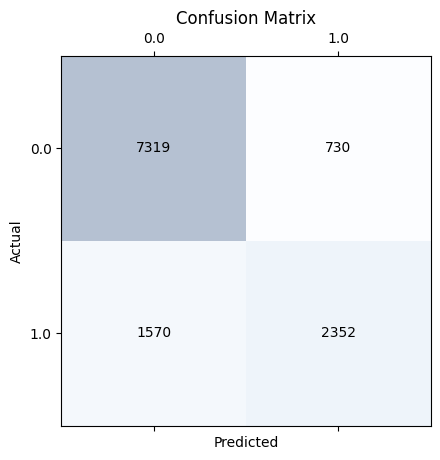

In [ ]:
# Calculate confusion matrix

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix as an image
cax = ax.matshow(matrix, cmap = 'Blues', alpha=.3)

# Set labels for x-axis and y-axis
ax.set_xticklabels([''] + list(np.unique(y_true)))
ax.set_yticklabels([''] + list(np.unique(y_true)))

# Set labels for colorbar and axis
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(j, i, str(matrix[i, j]), ha='center', va='center', color='black')
# Show the plot
plt.show()

In [ ]:
# Get the coefficients (feature weights) and feature names
coefficients = model.coef_[0]
intercept = model.intercept_[0]
feature_names = X_train.columns

# Create a DataFrame to store the feature importance
feature_importance_df = pd.DataFrame({'Feature': ['Intercept'] + list(feature_names),
                                      'Coefficient': [intercept] + list(coefficients)})

# Add a column with the absolute value of coefficients for sorting
feature_importance_df['Abs_Coefficient'] = np.abs(feature_importance_df['Coefficient'])

# Sort the features based on the absolute coefficients in descending order
feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False, inplace=True)

# Reset the index
feature_importance_df.reset_index(drop=True, inplace=True)

# Print the sorted feature importance
print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                                      Feature  Coefficient  Abs_Coefficient
0                                   Intercept    -2.057306         2.057306
1                        cat__arrival_month_1    -1.784433         1.784433
2                   remainder__repeated_guest    -1.712577         1.712577
3       remainder__required_car_parking_space    -1.597155         1.597155
4      cat__market_segment_type_Complementary    -1.556831         1.556831
5                              num__lead_time     1.423397         1.423397
6                       cat__arrival_month_12    -1.357797         1.357797
7                 num__no_of_special_requests    -1.201861         1.201861
8             cat__market_segment_type_Online     1.044196         1.044196
9           cat__market_segment_type_Aviation     1.022324         1.022324
10                       cat__arrival_month_2     0.967786         0.967786
11           cat__market_segment_type_Offline    -0.767327         0

# **Logistic Regression with L1 Penalty - 80.40%**

In [ ]:
param_grid={'C':np.logspace(-3, 3, 7)}
lr = LogisticRegression(penalty='l1',solver='liblinear')
grid_search = GridSearchCV(lr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

AttributeError: ignored

In [ ]:
lr_l1 = LogisticRegression(penalty='l2', solver='liblinear', C=1)
lr_l1.fit(X_train,y_train)
y_pred_l1 = lr_l1.predict(X_test)

# Accuracy score
m1 = accuracy_score(y_test,y_pred_l1).round(2)
# Precision score
m2 = precision_score(y_test,y_pred_l1).round(2)
# recall score
m3 = recall_score(y_test,y_pred_l1).round(2)
#F1 score
m4 = f1_score(y_test,y_pred_l1).round(2)

print("Accuracy:", m1, "Precision:", m2, "Recall:", m3, "f1:", m4)
print(f'Confusion Matrix:\n{confusion_matrix(y_test,y_pred_l1)}')

Accuracy: 0.81 Precision: 0.73 Recall: 0.64 f1: 0.68
Confusion Matrix:
[[7129  920]
 [1413 2509]]


# **Logistic Regression with L2 Penalty - 80.42%**

In [ ]:
param_grid={'C':np.logspace(-3, 3, 7)}
lr = LogisticRegression(penalty='l2',solver='liblinear')
grid_search = GridSearchCV(lr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

In [ ]:
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1)
lr_l2.fit(X_train,y_train)
y_pred_l2 = lr_l2.predict(X_test)

# Accuracy score
m1 = accuracy_score(y_test,y_pred_l2).round(2)
# Precision score
m2 = precision_score(y_test,y_pred_l2).round(2)
# recall score
m3 = recall_score(y_test,y_pred_l2).round(2)
#F1 score
m4 = f1_score(y_test,y_pred_l2).round(2)

print("Accuracy:", m1, "Precision:", m2, "Recall:", m3, "f1:", m4)
print(f'Confusion Matrix:\n{confusion_matrix(y_test,y_pred_l2)}')

Accuracy: 0.81 Precision: 0.73 Recall: 0.64 f1: 0.68
Confusion Matrix:
[[7129  920]
 [1413 2509]]


# **Logistic Regression Elastic Net - 80.43%**

In [ ]:
param_grid={'C':np.logspace(-3, 3, 7),
            'l1_ratio':np.arange(0.1,1.1,.1)}
lr = LogisticRegression(penalty='elasticnet',solver='saga')
grid_search = GridSearchCV(lr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train);

In [ ]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

In [ ]:
lr_en = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=.1,C=100)
lr_en.fit(X_train,y_train)
y_pred_en = lr_en.predict(X_test)

# Accuracy score
m1 = accuracy_score(y_test,y_pred_en).round(2)
# Precision score
m2 = precision_score(y_test,y_pred_en).round(2)
# recall score
m3 = recall_score(y_test,y_pred_en).round(2)
#F1 score
m4 = f1_score(y_test,y_pred_en).round(2)

print("Accuracy:", m1, "Precision:", m2, "Recall:", m3, "f1:", m4)
print(f'Confusion Matrix:\n{confusion_matrix(y_test,y_pred_en)}')

Accuracy: 0.81 Precision: 0.73 Recall: 0.64 f1: 0.68
Confusion Matrix:
[[7127  922]
 [1410 2512]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# **KNN Classifier - 85.5% Accuracy**

In [ ]:
max_acc = 0
best_n = 0
accs=[]
for t in np.arange(1, 100, 2):
  tempknn = KNeighborsClassifier(n_neighbors = t)
  tempknn.fit(X_train,y_train)
  temp_acc = tempknn.predict(X_test)
  accs.append(accuracy_score(y_test, temp_acc))
  if(accuracy_score(y_test, temp_acc)>max_acc):
    max_acc = accuracy_score(y_test, temp_acc)
    best_n = t
    matrix = confusion_matrix(y_test,temp_acc)
    m2 = precision_score(y_test,temp_acc).round(2)
    m3 = recall_score(y_test,temp_acc).round(2)
    m4 = f1_score(y_test,temp_acc).round(2)

print(f'Best KNN Accuracy: {max_acc}')
print(f'Best KNN neighbors: {best_n}')
print(f'PCS Confusion Matrix:\n {matrix}')
print ("PCS accuracy:", max_acc, " PCS precision:", m2, "PCS recall:", m3, "PCS f1:", m4)

Best KNN Accuracy: 0.8548158048617492
Best KNN neighbors: 11
PCS Confusion Matrix:
 [[7320  729]
 [1009 2913]]
PCS accuracy: 0.8548158048617492  PCS precision: 0.8 PCS recall: 0.74 PCS f1: 0.77


In [ ]:
n_values = range(1, 101,2)
plt.plot(n_values, accs)
plt.title('KNN Accuracy over N Values')
plt.xlabel('Number of Neighbors (N)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 101, 10))
plt.show()

In [ ]:
print(f'Best KNN Accuracy: {max_acc}')
print(f'Best KNN neighbors: {best_n}')
print(f'Confusion Matrix:\n {matrix}')
print ("Accuracy:", max_acc, " Precision:", m2, "Recall:", m3, "F1:", m4)

Best KNN Accuracy: 0.8548158048617492
Best KNN neighbors: 11
Confusion Matrix:
 [[7320  729]
 [1009 2913]]
Accuracy: 0.8548158048617492  Precision: 0.8 Recall: 0.74 F1: 0.77


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn_proba = knn.predict_proba(X_test)[:,1]

In [ ]:
#output of prediction model into DataFrame
y_df = pd.concat( [pd.DataFrame(y_pred_knn),pd.DataFrame(y_pred_knn_proba)], axis=1 )
y_df.columns = ["prediction", "probability"]
y_df

,prediction,probability
0,0.0,0.000000
1,1.0,0.545455
2,0.0,0.454545
3,0.0,0.454545
4,1.0,0.818182
...,...,...
11966,0.0,0.181818
11967,0.0,0.000000
11968,1.0,0.727273
11969,0.0,0.363636


In [ ]:
max_acc = 0
max_thresh = 0
for t in np.arange(0.0, 1.0, 0.01):
  y_pred_new=[1 if i > t else 0 for i in y_pred_knn_proba]
  if(accuracy_score(y_test, y_pred_new)>max_acc):
    max_acc = accuracy_score(y_test, y_pred_new)
    max_thresh = t
    matrix = confusion_matrix(y_test,y_pred_new)

print(f'Best KNN Accuracy: {max_acc}')
print(f'Best KNN Threshold: {max_thresh}')
print(f'Confusion Matrix:\n {matrix}')
print(f'NO BETTER TRESHOLD THAN .5')

Best KNN Accuracy: 0.8548158048617492
Best KNN Threshold: 0.46
Confusion Matrix:
 [[7320  729]
 [1009 2913]]
NO BETTER TRESHOLD THAN .5


In [ ]:
# Accuracy score
m1 = accuracy_score(y_test,y_pred_knn).round(2)

# Precision score
m2 = precision_score(y_test,y_pred_knn).round(2)

# recall score
m3 = recall_score(y_test, y_pred_knn).round(2)

#F1 score
m4 = f1_score(y_test, y_pred_knn).round(2)

print("accuracy:", m1, "precision:", m2, "recall:", m3, "f1:", m4)
print(f'Confusion Matrix:\n{confusion_matrix(y_test,y_pred_knn)}')

accuracy: 0.85 precision: 0.8 recall: 0.74 f1: 0.77
Confusion Matrix:
[[7320  729]
 [1009 2913]]


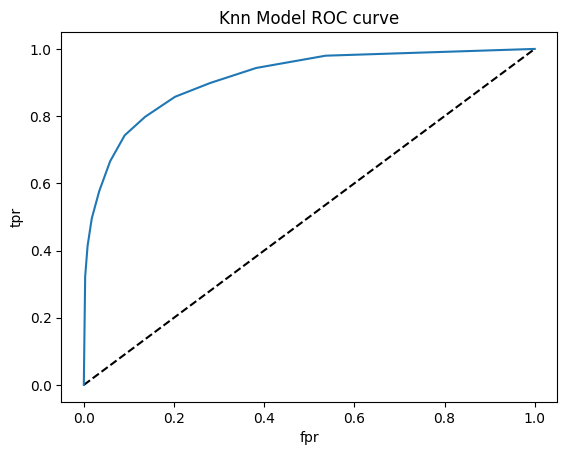

In [ ]:
# extract roc curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn_proba)

# plot roc curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn Model ROC curve')
plt.show()

<ipython-input-46-7d5df3390b60>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(np.unique(y_true)))
<ipython-input-46-7d5df3390b60>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + list(np.unique(y_true)))


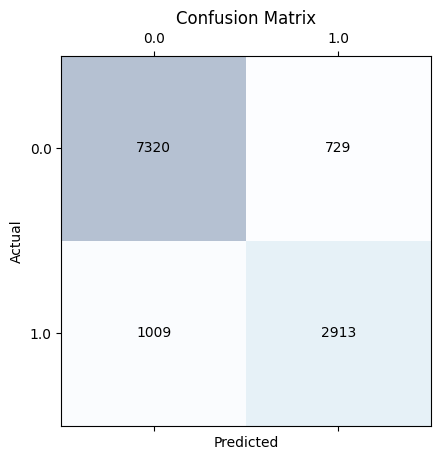

In [ ]:
# Calculate confusion matrix

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix as an image
cax = ax.matshow(confusion_matrix(y_test,y_pred_knn), cmap = 'Blues', alpha=.3)

# Set labels for x-axis and y-axis
ax.set_xticklabels([''] + list(np.unique(y_true)))
ax.set_yticklabels([''] + list(np.unique(y_true)))

# Set labels for colorbar and axis
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

for i in range(confusion_matrix(y_test,y_pred_knn).shape[0]):
    for j in range(confusion_matrix(y_test,y_pred_knn).shape[1]):
        ax.text(j, i, str(confusion_matrix(y_test,y_pred_knn)[i, j]), ha='center', va='center', color='black')
# Show the plot
plt.show()

# **KNN Classifier PCS - 88% Accuracy**

In [ ]:
max_acc = 0
best_n = 0
accs2 = []
for t in np.arange(1, 100, 2):
  tempknn = KNeighborsClassifier(n_neighbors = t)
  tempknn.fit(X_train_pcs,y_train_pcs)
  temp_acc = tempknn.predict(X_test_pcs)
  accs2.append(accuracy_score(y_test_pcs, temp_acc))
  if(accuracy_score(y_test_pcs, temp_acc)>max_acc):
    max_acc = accuracy_score(y_test_pcs, temp_acc)
    best_n = t
    matrix = confusion_matrix(y_test_pcs,temp_acc)
    m2 = precision_score(y_test_pcs,temp_acc).round(2)
    m3 = recall_score(y_test_pcs,temp_acc).round(2)
    m4 = f1_score(y_test_pcs,temp_acc).round(2)

print(f'Best PCS KNN Accuracy: {max_acc}')
print(f'Best PCS KNN Threshold: {best_n}')
print(f'PCS Confusion Matrix: {matrix}')
print ("PCS accuracy:", max_acc, " PCS precision:", m2, "PCS recall:", m3, "PCS f1:", m4)

Best PCS KNN Accuracy: 0.8815470720908863
Best PCS KNN Threshold: 1
PCS Confusion Matrix: [[7330  719]
 [ 699 3223]]
PCS accuracy: 0.8815470720908863  PCS precision: 0.82 PCS recall: 0.82 PCS f1: 0.82


In [ ]:
cost_matrix = [[0,60],[25,0]]
total_cost = np.sum(matrix * cost_matrix)

print("Total Cost:", total_cost)

Total Cost: 60615


<ipython-input-49-8240504de09a>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(np.unique(y_true)))
<ipython-input-49-8240504de09a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + list(np.unique(y_true)))


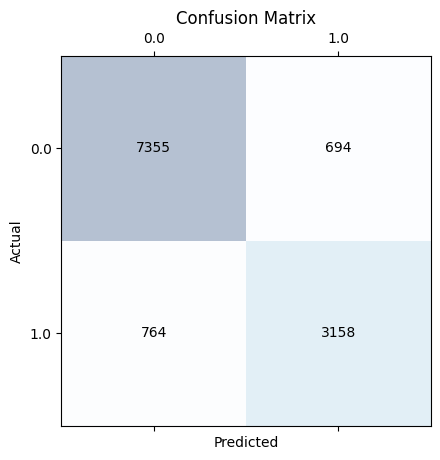

In [ ]:
# Calculate confusion matrix

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix as an image
cax = ax.matshow(matrix, cmap = 'Blues', alpha=.3)

# Set labels for x-axis and y-axis
ax.set_xticklabels([''] + list(np.unique(y_true)))
ax.set_yticklabels([''] + list(np.unique(y_true)))

# Set labels for colorbar and axis
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(j, i, str(matrix[i, j]), ha='center', va='center', color='black')
# Show the plot
plt.show()

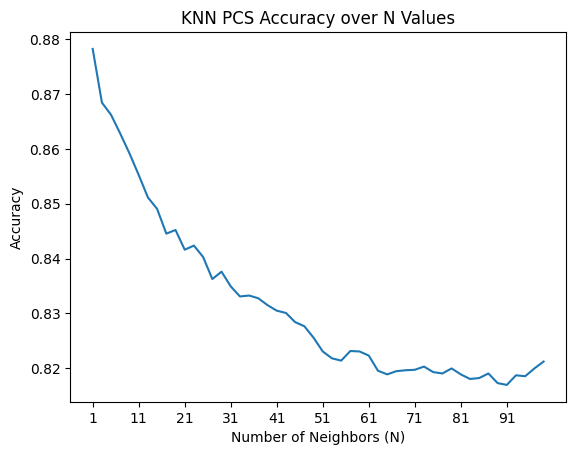

In [ ]:
n_values = range(1, 101,2)
plt.plot(n_values, accs2)
plt.title('KNN PCS Accuracy over N Values')
plt.xlabel('Number of Neighbors (N)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 101, 10))
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train_pcs,y_train_pcs)
y_pred_pcs = knn.predict(X_test_pcs)
y_pred_proba_pcs = knn.predict_proba(X_test_pcs)[:,1]

In [ ]:
#output of prediction model into DataFrame
y_df_pcs = pd.concat( [pd.DataFrame(y_pred_pcs),pd.DataFrame(y_pred_proba_pcs)], axis=1 )
y_df_pcs.columns = ["prediction", "probability"]
y_df_pcs

,prediction,probability
0,0.0,0.000000
1,0.0,0.363636
2,0.0,0.090909
3,0.0,0.090909
4,1.0,1.000000
...,...,...
11966,0.0,0.000000
11967,0.0,0.000000
11968,1.0,0.636364
11969,0.0,0.272727


In [ ]:
# Accuracy score
m1 = accuracy_score(y_test_pcs,y_pred_pcs).round(2)

# Precision score
m2 = precision_score(y_test_pcs,y_pred_pcs).round(2)

# recall score
m3 = recall_score(y_test_pcs,y_pred_pcs).round(2)

#F1 score
m4 = f1_score(y_test_pcs,y_pred_pcs).round(2)

print("PCS accuracy:", m1, " PCS precision:", m2, "PCS recall:", m3, "PCS f1:", m4)
print("PCS Confusion Matrix:\n ", confusion_matrix(y_test_pcs,y_pred_pcs))

PCS accuracy: 0.86  PCS precision: 0.81 PCS recall: 0.76 PCS f1: 0.78
PCS Confusion Matrix:
  [[7370  679]
 [ 952 2970]]


<ipython-input-95-0125a148d24d>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(np.unique(y_test)))
<ipython-input-95-0125a148d24d>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + list(np.unique(y_test)))


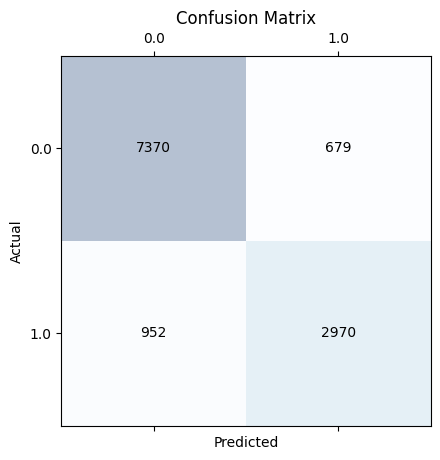

In [ ]:
# Calculate confusion matrix
matrix = confusion_matrix(y_test_pcs,y_pred_pcs)
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix as an image
cax = ax.matshow(matrix, cmap = 'Blues', alpha=.3)

# Set labels for x-axis and y-axis
ax.set_xticklabels([''] + list(np.unique(y_test)))
ax.set_yticklabels([''] + list(np.unique(y_test)))

# Set labels for colorbar and axis
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(j, i, str(matrix[i, j]), ha='center', va='center', color='black')
# Show the plot
plt.show()

# **Decision Tree w/o Pruning - 86.4% Accuracy**

In [ ]:
#DT with no pruning
full_clf = DecisionTreeClassifier(random_state=7)
full_tree = full_clf.fit(X_train, y_train)
print('Number of nodes', full_clf.tree_.node_count)
print('Max Depth',full_clf.tree_.max_depth)
print('Leaves',full_clf.tree_.n_leaves)

Number of nodes 6383
Max Depth 44
Leaves 3192


In [ ]:
# Feed input data to model to predict y output, for training data and test data, separately
y_pred_train = full_clf.predict(X_train)
y_pred_test = full_clf.predict(X_test)

# Accuracy of full tree on training and test sets
train_score = accuracy_score(y_train, y_pred_train)
test_score = accuracy_score(y_test, y_pred_test)

print('Accuracy score of full tree on training data =', round(train_score*100,1), '%')
print('Accuracy score of full tree on testing data =', round(test_score*100,1), '%')

# Confusion matrix of full tree on test set
print("Confusion Matrix on train data (watch out for overfitting!):")
print(confusion_matrix(y_train, y_pred_train))

print("Confusion Matrix of full tree on test data:")
print(confusion_matrix(y_test, y_pred_test))

# Accuracy score
m1 = accuracy_score(y_test_pcs,y_pred_test).round(2)

# Precision score
m2 = precision_score(y_test_pcs,y_pred_test).round(2)

# recall score
m3 = recall_score(y_test_pcs,y_pred_test).round(2)

#F1 score
m4 = f1_score(y_test_pcs,y_pred_test).round(2)
print("Full Tree Test accuracy:", m1, "Full Tree Test precision:", m2, "Full Tree Test recall:", m3, "Full Tree Test f1:", m4)

Accuracy score of full tree on training data = 99.4 %
Accuracy score of full tree on testing data = 86.8 %
Confusion Matrix on train data (watch out for overfitting!):
[[16310    31]
 [  124  7839]]
Confusion Matrix of full tree on test data:
[[7229  820]
 [ 766 3156]]
Full Tree Test accuracy: 0.87 Full Tree Test precision: 0.79 Full Tree Test recall: 0.8 Full Tree Test f1: 0.8


# **DT with Optimal Penalty - 85% Accuracy**

In [ ]:
#DT with Pruning

# Retrieve all the 'unique' values of penalty alpha and the impurity score
# they generate, from the full tree. We will use the cost_complexity_pruning_path() function
# To retrieve the alpha values, we need to call the option 'ccp_alphas'
alphas = full_clf.cost_complexity_pruning_path(X_train, y_train).ccp_alphas
impurities = full_clf.cost_complexity_pruning_path(X_train, y_train).impurities
print(len(alphas))
alphas

1365


array([0.00000000e+00, 0.00000000e+00, 6.32358972e-08, ...,
       1.58645804e-02, 2.40807077e-02, 7.51781691e-02])

In [ ]:
# Create a decision tree for each possible value of alpha, and store the
# trees in an array called 'clfs'

clfs = [] # this creates an empty array (placeholder)

# now loop through all the possible alphas
for i in alphas:
    my_clf = DecisionTreeClassifier(random_state=7, ccp_alpha=i, criterion='gini')
    my_clf.fit(X_train, y_train)
    clfs.append(my_clf) #this line adds to the fitted tree to the clfs[] array

# Display final array of Trees:
clfs

[DecisionTreeClassifier(random_state=7),
 DecisionTreeClassifier(random_state=7),
 DecisionTreeClassifier(ccp_alpha=6.323589721462012e-08, random_state=7),
 DecisionTreeClassifier(ccp_alpha=1.4286628629958437e-07, random_state=7),
 DecisionTreeClassifier(ccp_alpha=3.069127493089078e-07, random_state=7),
 DecisionTreeClassifier(ccp_alpha=1.1429302903957262e-06, random_state=7),
 DecisionTreeClassifier(ccp_alpha=1.1429302903957262e-06, random_state=7),
 DecisionTreeClassifier(ccp_alpha=1.4694818019373449e-06, random_state=7),
 DecisionTreeClassifier(ccp_alpha=1.4694818019373449e-06, random_state=7),
 DecisionTreeClassifier(ccp_alpha=1.6350096370980251e-06, random_state=7),
 DecisionTreeClassifier(ccp_alpha=1.714395435593603e-06, random_state=7),
 DecisionTreeClassifier(ccp_alpha=2.0572745227123262e-06, random_state=7),
 DecisionTreeClassifier(ccp_alpha=2.743032696949773e-06, random_state=7),
 DecisionTreeClassifier(ccp_alpha=2.743032696949773e-06, random_state=7),
 DecisionTreeClassifier

<ipython-input-115-df4bfe2fed2e>:5: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.set_xlim(0,.02,.001)


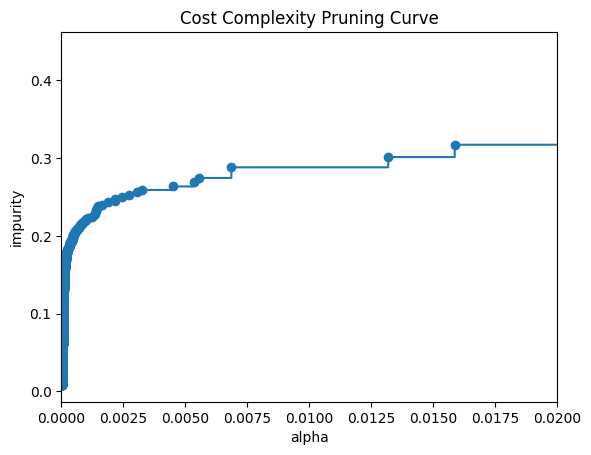

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("impurity")
plt.title('Cost Complexity Pruning Curve')
ax.set_xlim(0,.02,.001)
ax.plot(alphas, impurities, marker="o", drawstyle="steps-post")
plt.show()

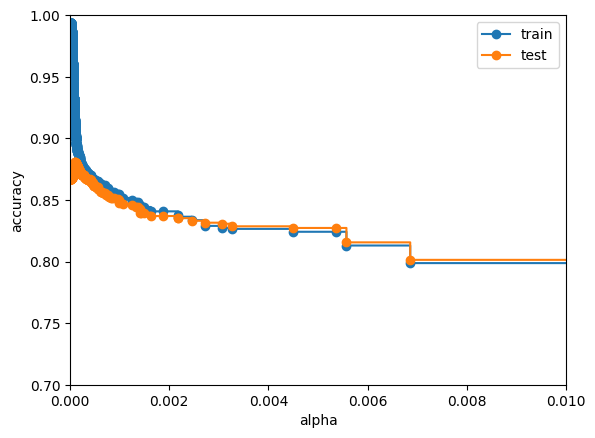

In [ ]:
# Let's try to find the best alpha to use...
# We can plot the tree predictive accuracy as a function of alpha
train_scores = [accuracy_score(y_train, x.predict(X_train)) for x in clfs]
test_scores = [accuracy_score(y_test, x.predict(X_test)) for x in clfs]

# BTW, there is also an alternative function: score() that does the same thing
# train_scores = [x.score(X_train, y_train) for x in clfs]
# test_scores = [x.score(X_test, y_test) for x in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
plt.xlim(0,0.01)
plt.ylim(0.7,1)
ax.plot(alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
final_clf = DecisionTreeClassifier(random_state=7, ccp_alpha=.003, criterion='gini')
final_clf.fit(X_train, y_train)
# Confusion matrix of "final" tree
y_pred_final = final_clf.predict(X_test)

# Accuracy score
m1 = accuracy_score(y_test,y_pred_final).round(2)

# Precision score
m2 = precision_score(y_test,y_pred_final).round(2)

# recall score
m3 = recall_score(y_test,y_pred_final).round(2)

#F1 score
m4 = f1_score(y_test,y_pred_final).round(2)
print("Pruned Tree Test accuracy:", m1, "Full Tree Test precision:", m2, "Full Tree Test recall:", m3, "Full Tree Test f1:", m4)
print("Pruned Tree Confusion Matrix:\n ", confusion_matrix(y_test,y_pred_final))

Accuracy score of reduced tree on test data : 83.15094812463454 %
Confusion Matrix of final reduced pruned tree on test data:
Pruned Tree Test accuracy: 0.83 Full Tree Test precision: 0.79 Full Tree Test recall: 0.65 Full Tree Test f1: 0.72
Pruned Tree Confusion Matrix:
  [[7386  663]
 [1354 2568]]


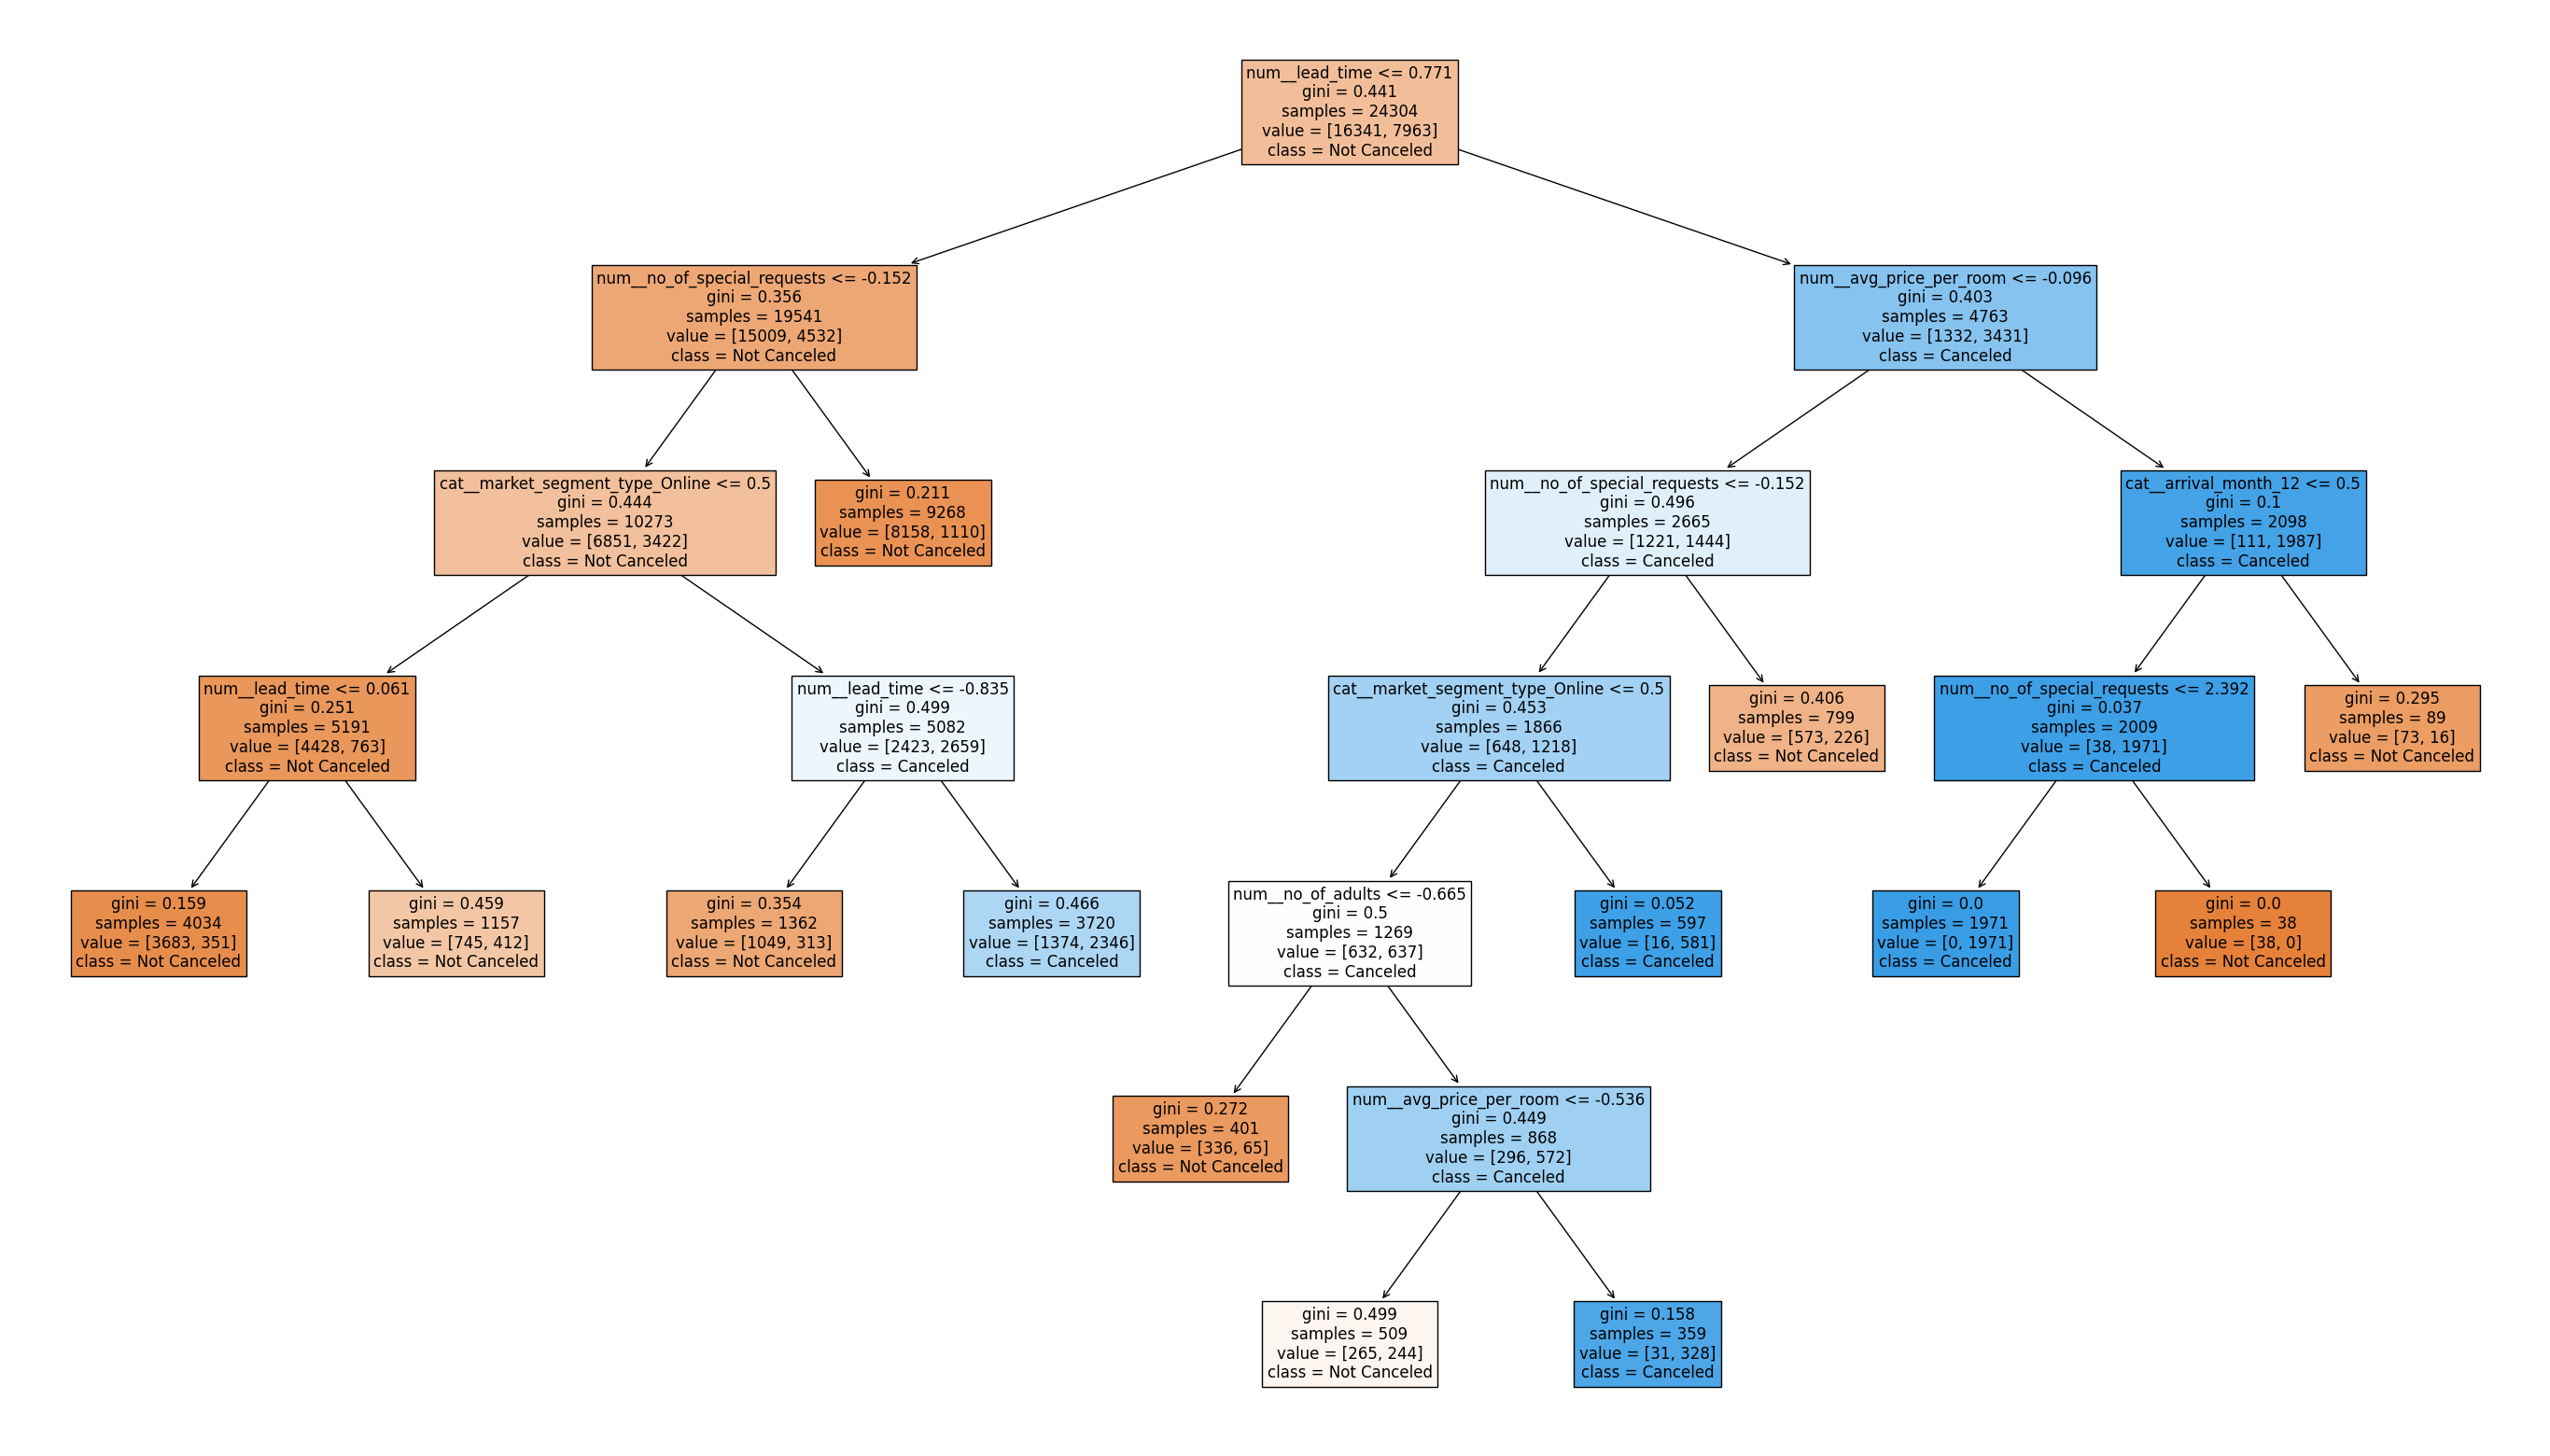

In [ ]:
# Plot the tree
fig = plt.figure(figsize=(35,20))
# define class names
cnames = ['Not Canceled','Canceled']
tree.plot_tree(final_clf, fontsize=12, feature_names=X.columns, class_names = cnames, filled=True);

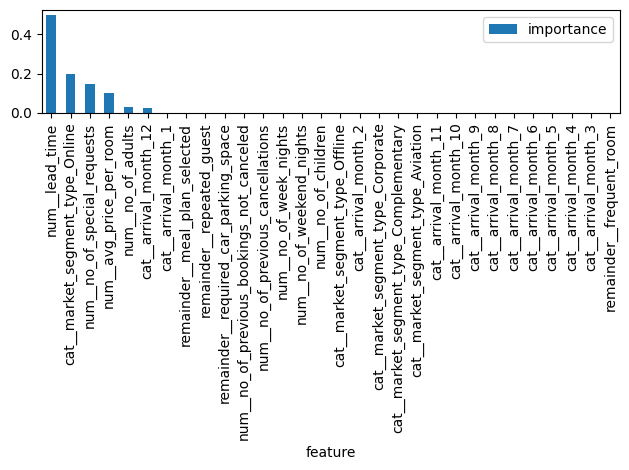

In [ ]:
# Extract importance values for each feature (column of X)
importances = final_clf.feature_importances_

# create a dataframe to store the values and their labels
df2 = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# sort dataframe by descending order, showing the most important feature top
df2 = df2.sort_values('importance', ascending = False)

# plot the importance of each feature
ax = df2.plot(kind='bar', x='feature')

plt.tight_layout()
plt.show()

In [ ]:
df2

,feature,importance
21,num__lead_time,0.498836
16,cat__market_segment_type_Online,0.198709
25,num__no_of_special_requests,0.146989
24,num__avg_price_per_room,0.101834
17,num__no_of_adults,0.029663
11,cat__arrival_month_12,0.023969
0,cat__arrival_month_1,0.000000
28,remainder__meal_plan_selected,0.000000
27,remainder__repeated_guest,0.000000
26,remainder__required_car_parking_space,0.000000


# **CV DT - 83.1%**

In [ ]:
#CV on Final Tree
accuracy_scores = cross_val_score(final_clf, X_train, y_train, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in accuracy_scores])
print('5-fold cross-validation mean accuracy:', round(accuracy_scores.mean(),3))

Accuracy scores of each fold:  ['0.835', '0.828', '0.836', '0.827', '0.827']
5-fold cross-validation mean accuracy: 0.831


# **Grid Search, Random Search DT - 86.1% Accuracy**

In [ ]:
param_dist = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2", None],
    "class_weight": [None, "balanced"],
}

In [ ]:
dt_rand = DecisionTreeClassifier(random_state=7)
random_search = RandomizedSearchCV(dt_rand, param_distributions=param_dist, cv=5, n_jobs=-1, n_iter=10, verbose=1)
random_search.fit(X_train, y_train)

In [ ]:
# Print the best score and parameters
print("Best score:", random_search.best_score_)
print("Best parameters:", random_search.best_params_)

In [ ]:
# Grid Search
# We create lists of all the values we want to search over
# This is called 'creating a grid'
param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_leaf': [20, 50, 100, 200],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
}

Best accuracy:  0.8607635984060588
Parameter values to achieve best accuracy:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_leaf': 20}


In [ ]:
# Then, use the GridSearchCV function which combines gridsearch with
# K-fold cross validation (cv parameter)
grid_dt = DecisionTreeClassifier(random_state=7)
gridSearch = GridSearchCV(rand_dt, param_grid, cv=5, scoring = 'accuracy', n_jobs=-1)
gridSearch.fit(X_train, y_train)

In [ ]:
print('Best accuracy: ', gridSearch.best_score_)
print('Parameter values to achieve best accuracy: ', gridSearch.best_params_)

In [ ]:
dt = DecisionTreeClassifier(random_state=7, max_depth = 10, min_impurity_decrease = 0, min_samples_leaf = 20, criterion = 'entropy')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_pred,y_test)

0.8615821568791245

In [ ]:
accuracy_scores = cross_val_score(dt, X_train, y_train, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in accuracy_scores])
print('5-fold cross-validation mean accuracy:', round(accuracy_scores.mean(),3))

Accuracy scores of each fold:  ['0.861', '0.854', '0.862', '0.861', '0.861']
5-fold cross-validation mean accuracy: 0.86


In [ ]:
print('Number of nodes', dt.tree_.node_count)
print('Max Depth',dt.tree_.max_depth)
print('Leaves',dt.tree_.n_leaves)

Number of nodes 407
Max Depth 10
Leaves 204


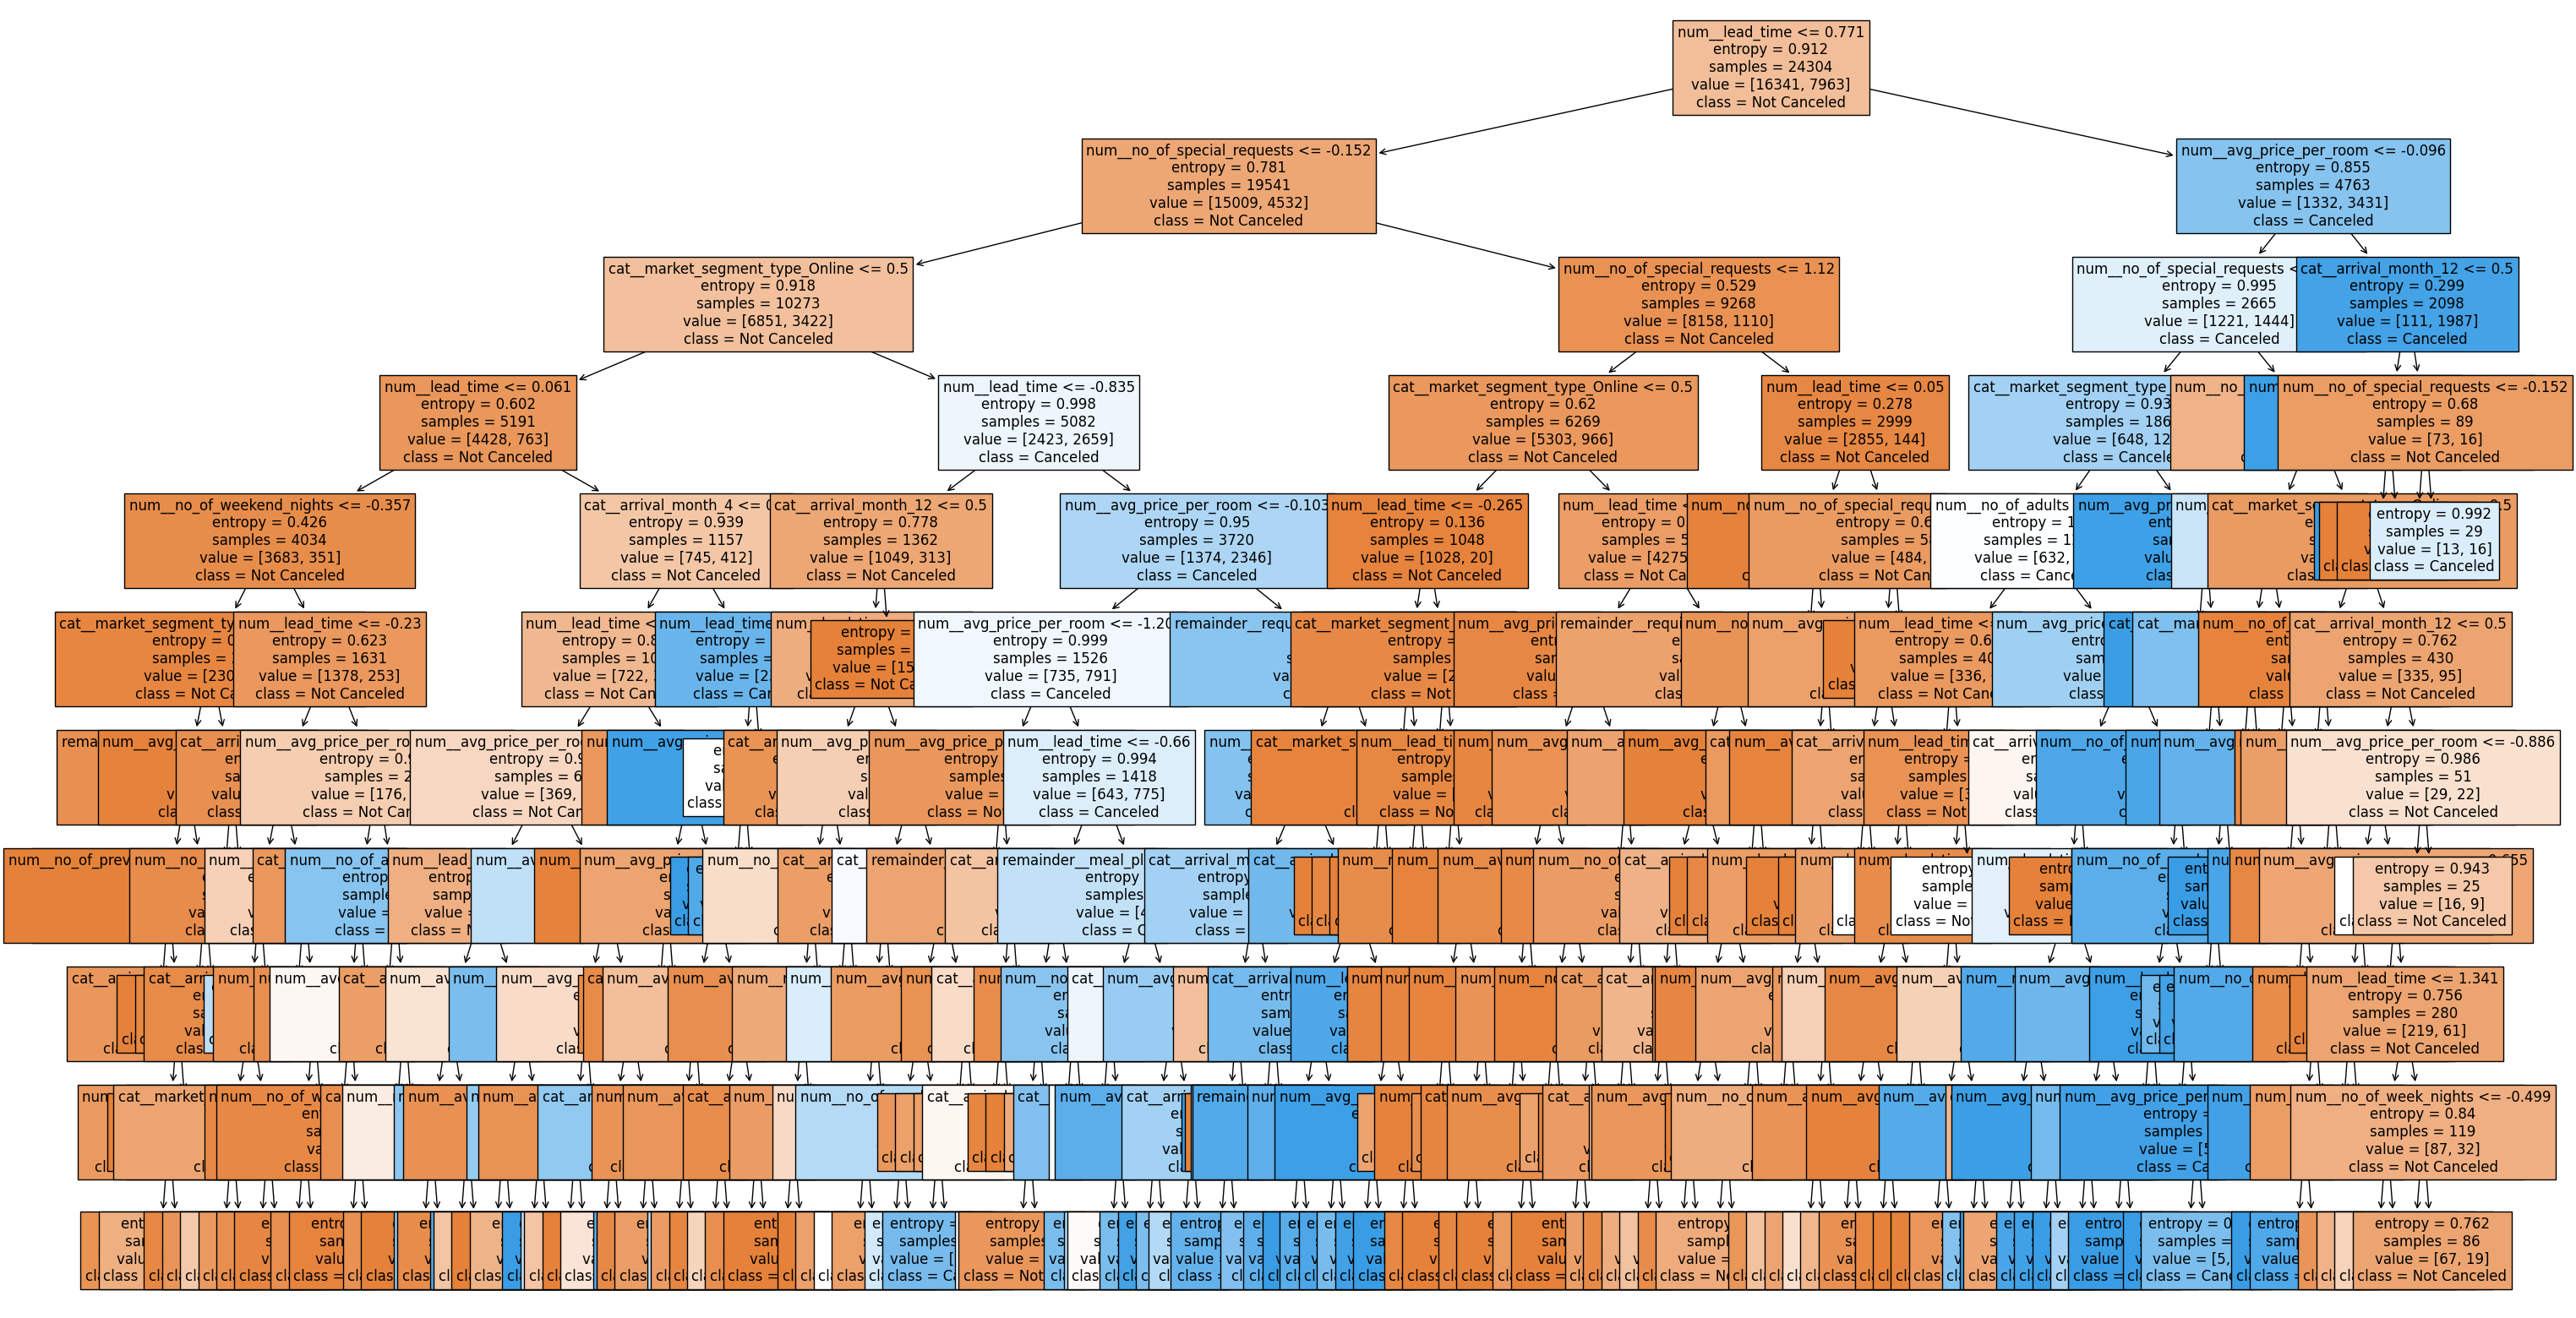

In [ ]:
# Plot the tree
fig = plt.figure(figsize=(35,20))
# define class names
cnames = ['Not Canceled','Canceled']
tree.plot_tree(dt, fontsize=12, feature_names=X.columns, class_names = cnames, filled=True);

# **Optimal DT with Error Costs**

In [ ]:
# Create a decision tree for each possible value of alpha, and store the
# trees in an array called 'clfs'

#Define the costs of each type of classification
#0 = Classify as not canceled when guest actually does cancel -
#    Hotel takes the deposit (assume one night stay) if within 48 hours (assume 1/10 of cancellations)
#    and assess a penalty for taxes and fees (assume $50): 304-101-50 = 153 * .1 = 15.3
#    Round up to 25 assuming some amount of missed revenue on amenities
#    Expenses relating to room still exist, room must be cleaned, power runs, etc.
#1 = classify as canceled when guest actually shows -
#    Generally more costly than a no-show bc the hotel may have not have vancancy or will need to upgrade rooms
#    Assume 8/10 times there is a vacancy or the room can be rebooked with another reservation
#    Assume in 1/10 of cases a room will need to be upgraded (Avg cost of R4 - Avg cost of R1) * .1
#       128 * .1
#    Assume in 1/10 of cases a guest will need to be compensated their stay and rebooked somewhere else (avg. cost of R4)
#       435 * .1
#    Total cost = 12.8 + 43.5 = 56.3 round to 60
costs = {0: 60, 1: 25}
#cost_matrix = [[0,60],[25,-0]]

cost_clf = DecisionTreeClassifier(random_state=7, criterion='gini', class_weight=costs)
cost_clf.fit(X_train,y_train)

alphas = cost_clf.cost_complexity_pruning_path(X_train, y_train).ccp_alphas
impurities = cost_clf.cost_complexity_pruning_path(X_train, y_train).impurities

cost_clfs = [] # this creates an empty array (placeholder)

# Define the sample weights based on the costs
sample_weights = y_train.map(costs)

# now loop through all the possible alphas
for i in alphas:
    my_clf = DecisionTreeClassifier(random_state=7, ccp_alpha=i, criterion='gini', class_weight=costs)
    my_clf.fit(X_train, y_train, sample_weight=sample_weights)
    cost_clfs.append(my_clf) #this line adds to the fitted tree to the clfs[] array

# Display final array of Trees:
cost_clfs

[DecisionTreeClassifier(class_weight={0: 60, 1: 25}, random_state=7),
 DecisionTreeClassifier(class_weight={0: 60, 1: 25}, random_state=7),
 DecisionTreeClassifier(ccp_alpha=1.3829580734396965e-08,
                        class_weight={0: 60, 1: 25}, random_state=7),
 DecisionTreeClassifier(ccp_alpha=3.119858742160628e-08,
                        class_weight={0: 60, 1: 25}, random_state=7),
 DecisionTreeClassifier(ccp_alpha=7.083032036296643e-08,
                        class_weight={0: 60, 1: 25}, random_state=7),
 DecisionTreeClassifier(ccp_alpha=2.528960071188999e-07,
                        class_weight={0: 60, 1: 25}, random_state=7),
 DecisionTreeClassifier(ccp_alpha=2.829430574696485e-07,
                        class_weight={0: 60, 1: 25}, random_state=7),
 DecisionTreeClassifier(ccp_alpha=2.829430574696485e-07,
                        class_weight={0: 60, 1: 25}, random_state=7),
 DecisionTreeClassifier(ccp_alpha=3.7113310135629873e-07,
                        class_weight={0

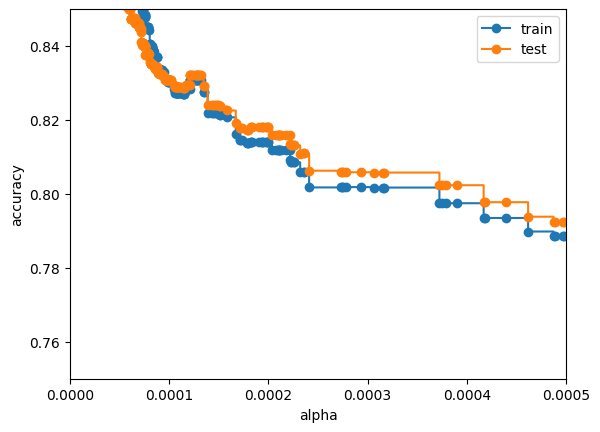

In [ ]:
# Let's try to find the best alpha to use...
# We can plot the tree predictive accuracy as a function of alpha
train_scores = [accuracy_score(y_train, x.predict(X_train)) for x in cost_clfs]
test_scores = [accuracy_score(y_test, x.predict(X_test)) for x in cost_clfs]

# BTW, there is also an alternative function: score() that does the same thing
# train_scores = [x.score(X_train, y_train) for x in clfs]
# test_scores = [x.score(X_test, y_test) for x in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
plt.xlim(0,0.0005)
plt.ylim(0.75,.85)
ax.plot(alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

<ipython-input-64-d2ccbe48f766>:5: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.set_xlim(0,.005,.0005)


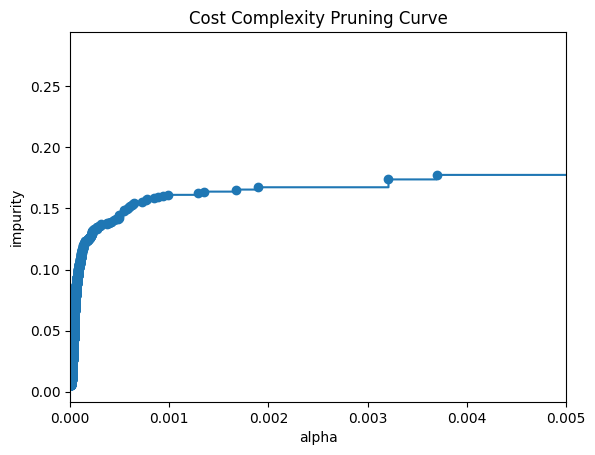

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("impurity")
plt.title('Cost Complexity Pruning Curve')
ax.set_xlim(0,.005,.0005)
ax.plot(alphas, impurities, marker="o", drawstyle="steps-post")
plt.show()

In [ ]:
costs = {0: 60, 1: 25}
sample_weights = y_train.map(costs)

final_cost_clf = DecisionTreeClassifier(random_state=7, ccp_alpha=.001, criterion='gini',class_weight=costs)
final_cost_clf.fit(X_train, y_train,sample_weight=sample_weights)
# Confusion matrix of "final" tree
y_pred_final = final_cost_clf.predict(X_test)

print("Accuracy score of reduced cost-weighted tree on test data :", accuracy_score(y_test, y_pred_final)*100, "%")

# Accuracy score
m1 = accuracy_score(y_test,y_pred_final).round(2)

# Precision score
m2 = precision_score(y_test,y_pred_final).round(2)

# recall score
m3 = recall_score(y_test,y_pred_final).round(2)

#F1 score
m4 = f1_score(y_test,y_pred_final).round(2)
print("Final Pruned Cost-Weighted Tree accuracy:", m1, "\nFinal Pruned Cost-Weighted Tree precision:", m2, "\nFinal Pruned Cost-Weighted Tree recall:", m3, "\nFinal Pruned Cost-Weighted Tree f1:", m4)
print("Final Pruned Cost-Weighted Tree Confusion Matrix:\n ", confusion_matrix(y_test,y_pred_final))

Accuracy score of reduced cost-weighted tree on test data : 78.78205663687244 %
Final Pruned Cost-Weighted Tree accuracy: 0.79 
Final Pruned Cost-Weighted Tree precision: 0.99 
Final Pruned Cost-Weighted Tree recall: 0.35 
Final Pruned Cost-Weighted Tree f1: 0.52
Final Pruned Cost-Weighted Tree Confusion Matrix:
  [[8041    8]
 [2532 1390]]


In [ ]:
# Make predictions on test data
cost_matrix = [[0,60],[25,0]]
y_pred_probs = final_cost_clf.predict_proba(X_test) # predict class probabilities

# Apply different classification thresholds
thresholds = np.arange(0, 1.01, 0.01)  # Example thresholds
min_cost = float('inf')  # Initialize minimum cost
optimal_threshold = None  # Initialize optimal threshold

for threshold in thresholds:
    # Convert class probabilities to binary predictions using threshold
    y_pred = (y_pred_probs[:, 1] > threshold).astype(int)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate total cost
    total_cost = np.sum(cm * cost_matrix)

    # Update minimum cost and optimal threshold if necessary
    if total_cost < min_cost:
        min_cost = total_cost
        optimal_threshold = threshold

# Print optimal threshold and minimum cost
print("Optimal Threshold: ", optimal_threshold)
print("Minimum Cost: ", min_cost)

Optimal Threshold:  0.25
Minimum Cost:  63780


In [ ]:
# Make predictions on test data
y_pred_probs = final_cost_clf.predict_proba(X_test) # predict class probabilities
optimal_threshold = 0.25  # Example optimal threshold

# Convert class probabilities to binary predictions using optimal threshold
y_pred = (y_pred_probs[:, 1] > optimal_threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display accuracy, precision, recall, F1 score, and confusion matrix
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Confusion Matrix:\n", cm)

Accuracy:  0.7878205663687244
Precision:  0.994277539341917
Recall:  0.3544110147883733
F1 Score:  0.5225563909774436
Confusion Matrix:
 [[8041    8]
 [2532 1390]]


In [ ]:
# Calculate confusion matrix

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix as an image
cax = ax.matshow(cm, cmap = 'Blues', alpha=.3)

# Set labels for x-axis and y-axis
ax.set_xticklabels([''] + list(np.unique(y_true)))
ax.set_yticklabels([''] + list(np.unique(y_true)))

# Set labels for colorbar and axis
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')
# Show the plot
plt.show()

NameError: ignored

In [ ]:
# Plot the tree
fig = plt.figure(figsize=(35,20))
# define class names
cnames = ['Not Canceled','Canceled']
tree.plot_tree(final_cost_clf, fontsize=12, feature_names=X.columns, class_names = cnames, filled=True);
plt.savefig('/content/drive/MyDrive/final_tree.jpg')

In [ ]:
%%capture
!pip install dtreeviz
import dtreeviz

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


ValueError: ignored

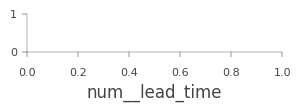

In [ ]:
X_int = X_train.astype(int)
y_int = y_train.astype(int)
viz = dtreeviz.model(final_cost_clf,
               X_train=X_int,
               y_train=y_int,
               target_name='class',
               feature_names=X.columns,
               class_names = cnames)
viz.view()

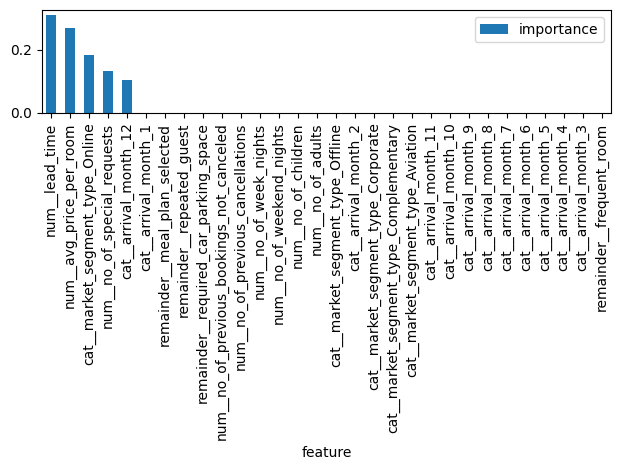

In [ ]:
# Extract importance values for each feature (column of X)
importances = final_cost_clf.feature_importances_

# create a dataframe to store the values and their labels
df2 = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# sort dataframe by descending order, showing the most important feature top
df2 = df2.sort_values('importance', ascending = False)

# plot the importance of each feature
ax = df2.plot(kind='bar', x='feature')

plt.tight_layout()
plt.show()

In [ ]:
df2

,feature,importance
21,num__lead_time,0.311163
24,num__avg_price_per_room,0.268202
16,cat__market_segment_type_Online,0.183432
25,num__no_of_special_requests,0.131606
11,cat__arrival_month_12,0.105597
0,cat__arrival_month_1,0.000000
28,remainder__meal_plan_selected,0.000000
27,remainder__repeated_guest,0.000000
26,remainder__required_car_parking_space,0.000000
23,num__no_of_previous_bookings_not_canceled,0.000000


# **ADA Boost DT - 89.2%**

In [ ]:
param_dist = {'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                 DecisionTreeClassifier(max_depth=3),
                                 DecisionTreeClassifier(max_depth=5),
                                 DecisionTreeClassifier(max_depth=7)],
              'n_estimators': randint(50, 2000),
              'learning_rate': [0.01, 0.1, 1, 10],
              'algorithm': ['SAMME']}

In [ ]:
#base_clf = DecisionTreeClassifier(random_state=7, max_depth=3)
ada = AdaBoostClassifier(random_state=7)
rand_search = RandomizedSearchCV(ada, param_distributions=param_dist, n_iter=20,
                                 scoring='accuracy', n_jobs=-1, cv=5, random_state=42, verbose=2)

In [ ]:
rand_search.fit(X, y)

In [ ]:
print('Best hyperparameters: ', rand_search.best_params_)
print('Best score: ', rand_search.best_score_)

Best hyperparameters:  {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=7), 'learning_rate': 1, 'n_estimators': 1735}
Best score:  0.8917711922811854


In [ ]:
#Best DT created from ADA randomized search
base_clf = DecisionTreeClassifier(random_state=7,
                                  max_depth=7)
ada = AdaBoostClassifier(base_estimator = base_clf, random_state=7, learning_rate = 1,n_estimators = 1735, algorithm = 'SAMME')
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)
accuracy_score(y_pred_ada, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8931584662935427

In [ ]:
# Accuracy score
m1 = accuracy_score(y_test,y_pred_ada).round(2)

# Precision score
m2 = precision_score(y_test,y_pred_ada).round(2)

# recall score
m3 = recall_score(y_test,y_pred_ada).round(2)

#F1 score
m4 = f1_score(y_test,y_pred_ada).round(2)
print("Final Pruned Cost-Weighted Tree accuracy:", m1, "\nFinal Pruned Cost-Weighted Tree precision:", m2, "\nFinal Pruned Cost-Weighted Tree recall:", m3, "\nFinal Pruned Cost-Weighted Tree f1:", m4)
print("Final Pruned Cost-Weighted Tree Confusion Matrix:\n ", confusion_matrix(y_test,y_pred_ada))

Final Pruned Cost-Weighted Tree accuracy: 0.89 
Final Pruned Cost-Weighted Tree precision: 0.86 
Final Pruned Cost-Weighted Tree recall: 0.8 
Final Pruned Cost-Weighted Tree f1: 0.83
Final Pruned Cost-Weighted Tree Confusion Matrix:
  [[7539  510]
 [ 769 3153]]


<ipython-input-53-d7d33ff95487>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(np.unique(y_true)))
<ipython-input-53-d7d33ff95487>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + list(np.unique(y_true)))


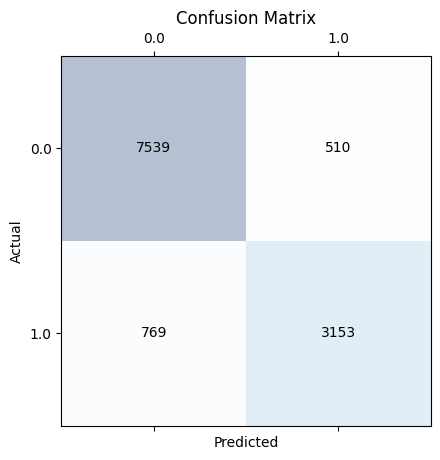

In [ ]:
# Calculate confusion matrix

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix as an image
cax = ax.matshow(confusion_matrix(y_test,y_pred_ada), cmap = 'Blues', alpha=.3)

# Set labels for x-axis and y-axis
ax.set_xticklabels([''] + list(np.unique(y_true)))
ax.set_yticklabels([''] + list(np.unique(y_true)))

# Set labels for colorbar and axis
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

for i in range(confusion_matrix(y_test,y_pred_ada).shape[0]):
    for j in range(confusion_matrix(y_test,y_pred_ada).shape[1]):
        ax.text(j, i, str(confusion_matrix(y_test,y_pred_ada)[i, j]), ha='center', va='center', color='black')
# Show the plot
plt.show()

In [ ]:
cv_ada = cross_val_score(ada,X_train,y_train,cv=5)
cv_ada.mean()

# **Random Forest - 89.1% Accuracy**

In [ ]:
# Run the RF classifier, specifying the number of trees to generate
# Note, being careful about overfitting is not as critical
# when using random forest classifiers, given they randomize over
# the data and the feature columns
# n_estimators is the total number of different random trees to generate
#
rf = RandomForestClassifier(
    n_estimators=1400,
    random_state=7,
    criterion='gini')
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1400, random_state=7)

In [ ]:
y_pred_rf = rf.predict(X_test)
print("Train Accuracy = ", accuracy_score(y_train, rf.predict(X_train)))
print("Accuracy=", accuracy_score(y_test, y_pred_rf))
confusion_matrix(y_test, y_pred_rf)

Train Accuracy =  0.9936224489795918
Accuracy= 0.8957480578063653


array([[7587,  462],
       [ 786, 3136]])

<ipython-input-69-be4aeb7da152>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(np.unique(y_true)))
<ipython-input-69-be4aeb7da152>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + list(np.unique(y_true)))


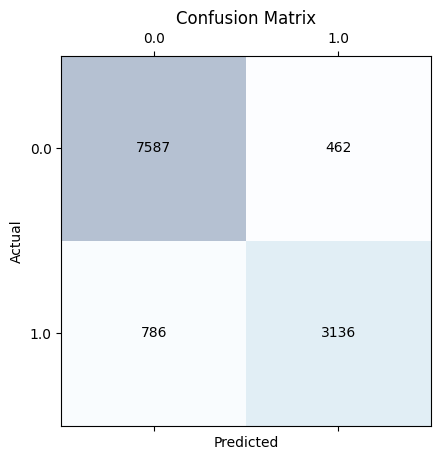

In [ ]:
# Calculate confusion matrix

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix as an image
cax = ax.matshow(confusion_matrix(y_test,y_pred_rf), cmap = 'Blues', alpha=.3)

# Set labels for x-axis and y-axis
ax.set_xticklabels([''] + list(np.unique(y_true)))
ax.set_yticklabels([''] + list(np.unique(y_true)))

# Set labels for colorbar and axis
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

for i in range(confusion_matrix(y_test,y_pred_rf).shape[0]):
    for j in range(confusion_matrix(y_test,y_pred_rf).shape[1]):
        ax.text(j, i, str(confusion_matrix(y_test,y_pred_rf)[i, j]), ha='center', va='center', color='black')
# Show the plot
plt.show()

In [ ]:
score = cross_val_score(rf, X_train,y_train,cv=5)
score.mean()

0.8903885464471992

In [ ]:
y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[7593,  456],
       [ 791, 3131]])

In [ ]:
# Accuracy score
m1 = accuracy_score(y_test,y_pred_rf).round(3)

# Precision score
m2 = precision_score(y_test,y_pred_rf).round(3)

# recall score
m3 = recall_score(y_test,y_pred_rf).round(3)

#F1 score
m4 = f1_score(y_test,y_pred_rf).round(3)

print ("RF accuracy:", m1, "RF precision:", m2, "RF recall:", m3, "RF f1:", m4)

RF accuracy: 0.896 RF precision: 0.872 RF recall: 0.8 RF f1: 0.834


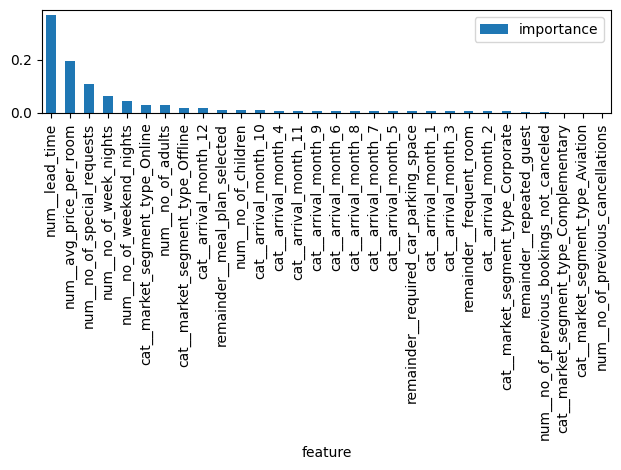

In [ ]:
# Extract importance values for each feature (column of X)
importances = rf.feature_importances_

# create a dataframe to store the values and their labels
df2 = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# sort dataframe by descending order, showing the most important feature top
df2 = df2.sort_values('importance', ascending = False)

# plot the importance of each feature
ax = df2.plot(kind='bar', x='feature')

plt.tight_layout()
plt.show()

In [ ]:
df2

,feature,importance
21,num__lead_time,0.368742
24,num__avg_price_per_room,0.196410
25,num__no_of_special_requests,0.107509
20,num__no_of_week_nights,0.063309
19,num__no_of_weekend_nights,0.045132
16,cat__market_segment_type_Online,0.028716
17,num__no_of_adults,0.028544
15,cat__market_segment_type_Offline,0.017278
11,cat__arrival_month_12,0.016581
28,remainder__meal_plan_selected,0.012473


# **Random Forest Random and Grid Search**

In [ ]:
param_dist = {
    'n_estimators': stats.randint(1000, 10000),
    #'max_depth': stats.randint(20,50),
    #'max_features': ['sqrt'],
    #'min_samples_split': stats.randint(2, 50),
    #'min_samples_leaf': stats.randint(1, 25),
    'criterion': ['gini', 'entropy']
}

In [ ]:
rf_rand = RandomForestClassifier(random_state=7)
random_search = RandomizedSearchCV(rf_rand, param_distributions=param_dist, cv=5, n_jobs=-1, n_iter=10, verbose=1)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=7),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f8b943bdf70>},
                   verbose=1)

In [ ]:
# Print the best score and parameters
print("Best score:", random_search.best_score_)
print("Best parameters:", random_search.best_params_)

Best score: 0.8907176037039577
Best parameters: {'criterion': 'entropy', 'n_estimators': 2281}


In [ ]:
param_grid = {
    'n_estimators': [100, 250, 500, 1000, 1500],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini'],
}

In [ ]:
rf_grid = RandomForestClassifier(random_state=7)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

In [ ]:
# Print the best score and parameters
print("Best score:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)

# **Neural Net - 86%**

Optimal NN so far:

Best parameters:  
{'activation': 'relu',
'alpha': 0.1,
'hidden_layer_sizes': (20, 10),
'learning_rate': 'adaptive',
'max_iter': 500,
'solver': 'lbfgs'}

Best score:  0.8608459113986097

In [ ]:
# list of the two transformations we want to do, and on which features
t = [('cat', OneHotEncoder(), categorical_predictors),
     ('num',MinMaxScaler(),numerical_predictors)]

# instantiate columntransformer with our transformations t
col_transform = ColumnTransformer(transformers=t, remainder='passthrough')
minmax_df = pd.DataFrame(col_transform.fit_transform(df[all_predictors]))
minmax_df.columns = col_transform.get_feature_names_out()
#X = minmax_df.drop(columns = ['remainder__booking_canceled'])
#y = minmax_df['remainder__booking_canceled']
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.33,random_state=7, stratify=y)
minmax_df

,cat__arrival_month_1,cat__arrival_month_2,cat__arrival_month_3,cat__arrival_month_4,cat__arrival_month_5,cat__arrival_month_6,cat__arrival_month_7,cat__arrival_month_8,cat__arrival_month_9,cat__arrival_month_10,cat__arrival_month_11,cat__arrival_month_12,cat__market_segment_type_Aviation,cat__market_segment_type_Complementary,cat__market_segment_type_Corporate,cat__market_segment_type_Offline,cat__market_segment_type_Online,num__no_of_adults,num__no_of_children,num__no_of_weekend_nights,num__no_of_week_nights,num__lead_time,num__no_of_previous_cancellations,num__no_of_previous_bookings_not_canceled,num__avg_price_per_room,num__no_of_special_requests,remainder__required_car_parking_space,remainder__repeated_guest,remainder__meal_plan_selected,remainder__frequent_room,remainder__booking_canceled
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.50,0.0,0.142857,0.117647,0.505643,0.0,0.0,0.120370,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.50,0.0,0.285714,0.176471,0.011287,0.0,0.0,0.197556,0.2,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.25,0.0,0.285714,0.058824,0.002257,0.0,0.0,0.111111,0.0,0.0,0.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.50,0.0,0.000000,0.117647,0.476298,0.0,0.0,0.185185,0.0,0.0,0.0,1.0,1.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.50,0.0,0.142857,0.058824,0.108352,0.0,0.0,0.175000,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.285714,0.352941,0.191874,0.0,0.0,0.310741,0.2,0.0,0.0,1.0,1.0,0.0
36271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.50,0.0,0.142857,0.176471,0.514673,0.0,0.0,0.168426,0.4,0.0,0.0,1.0,1.0,1.0
36272,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.50,0.0,0.285714,0.352941,0.334086,0.0,0.0,0.182204,0.4,0.0,0.0,1.0,1.0,0.0
36273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.50,0.0,0.000000,0.176471,0.142212,0.0,0.0,0.175000,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
nnet = MLPClassifier(
    hidden_layer_sizes=(50,50),
    activation = 'relu',
    solver = 'lbfgs',
    learning_rate = 'adaptive',
    alpha = .1,
    max_iter = 2000,
    random_state=7,
    verbose=2
);
nnet.fit(X_train,y_train)
y_pred = nnet.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
accuracy_score(y_pred,y_test)

0.8670954807451341

In [ ]:
m1=cross_val_score(nnet, X_train, y_train, cv=5)
m1.mean()

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

0.8608459113986097

In [ ]:
#print(accuracy_score(y_test,y_pred))
# Accuracy score
m1 = accuracy_score(y_test, y_pred)

# Precision score
m2 = precision_score(y_test,y_pred).round(2)

# recall score
m3 = recall_score(y_test, y_pred).round(2)

#F1 score
m4 = f1_score(y_test, y_pred).round(2)

print ("accuracy:", m1, "precision:", m2, "recall:", m3, "f1:", m4)
confusion_matrix(y_test,y_pred)

accuracy: 0.8670954807451341 precision: 0.8 recall: 0.79 f1: 0.8


array([[7295,  754],
       [ 837, 3085]])

<ipython-input-98-854dbd6479a1>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(np.unique(y_test)))
<ipython-input-98-854dbd6479a1>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + list(np.unique(y_test)))


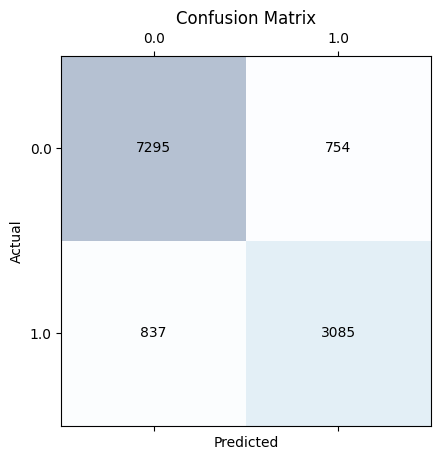

In [ ]:
# Calculate confusion matrix
matrix = confusion_matrix(y_test,y_pred)
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix as an image
cax = ax.matshow(matrix, cmap = 'Blues', alpha=.3)

# Set labels for x-axis and y-axis
ax.set_xticklabels([''] + list(np.unique(y_test)))
ax.set_yticklabels([''] + list(np.unique(y_test)))

# Set labels for colorbar and axis
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(j, i, str(matrix[i, j]), ha='center', va='center', color='black')
# Show the plot
plt.show()

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(10,10),(20,10)],
    'activation': ['logistic', 'relu'],
    'solver': ['lbfgs', 'adam'],
    'alpha': [0.01, 0.1],
    'learning_rate': ['adaptive'],
    'max_iter': [1000]
}

In [ ]:
mlp = MLPClassifier(random_state=7)
grid_search = GridSearchCV(mlp, param_grid, cv=5, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  16.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  16.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  17.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  17.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  16.6s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  24.6s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  25.6s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  30.8s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  25.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  24.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  20.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  23.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  21.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  23.9s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  27.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  36.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  34.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  37.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  40.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  36.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  16.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  16.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  16.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  16.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  16.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  17.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  16.5s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  21.5s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  11.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=   9.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  21.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  20.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  22.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  20.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  20.5s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  17.5s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  21.3s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  18.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  19.7s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  20.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  13.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  13.9s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  14.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  13.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  12.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  19.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  17.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  12.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  15.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  16.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  17.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  17.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  16.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  17.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  17.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  21.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  18.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  25.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  21.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  19.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  11.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  13.9s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  13.9s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  13.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  13.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  17.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  16.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  15.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  14.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  16.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  16.9s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  16.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  16.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  16.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=  17.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  15.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  18.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  14.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  17.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, max_iter=500, solver=adam; total time=  15.1s
Best parameters:  {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (20, 10), 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'lbfgs'}
Best score:  0.8608459113986097

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (20, 10), 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'lbfgs'}
Best score:  0.8608459113986097


# **Neural Net PCS - 84%**

In [ ]:
pcs_nnet = MLPClassifier(
    hidden_layer_sizes=(20,10),
    activation = 'relu',
    solver = 'lbfgs',
    learning_rate = 'adaptive',
    alpha = .1,
    max_iter = 500,
    random_state=7,
    verbose=2);
pcs_nnet.fit(X_train_pcs,y_train_pcs)
y_pred_pcs = pcs_nnet.predict(X_test_pcs)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
#print(accuracy_score(y_test,y_pred))
# Accuracy score
m1 = accuracy_score(y_test_pcs, y_pred_pcs).round(2)

# Precision score
m2 = precision_score(y_test_pcs, y_pred_pcs).round(2)

# recall score
m3 = recall_score(y_test_pcs, y_pred_pcs).round(2)

#F1 score
m4 = f1_score(y_test_pcs, y_pred_pcs).round(2)

print ("accuracy:", m1, "precision:", m2, "recall:", m3, "f1:", m4)
confusion_matrix(y_test_pcs,y_pred_pcs)

accuracy: 0.84 precision: 0.8 recall: 0.68 f1: 0.73


array([[7365,  684],
       [1260, 2662]])

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,50),(75,75),(50,50,50),(75,75,75)],
    'activation': ['logistic'],
    'solver': ['lbfgs'],
    'alpha': [0.01],
    'learning_rate': ['adaptive'],
    'max_iter': [3000]
}

In [ ]:
mlp = MLPClassifier(random_state=7)
grid_search = GridSearchCV(mlp, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_pcs, y_train_pcs)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)